# **Análise do sensor 1**

##1. Carregar o dado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregar os dados
#file_path = '/content/dataset_shrink_transformed.npz'
file_path = 'dataset_shrink_transformed.npz'
data = np.load(file_path)
arr_0 = data['arr_0']
arr_1 = data['arr_1']

# arr_1 contém as datas e arr_0 contém os dados dos sensores
dates = pd.to_datetime(arr_1)
sensor_data = pd.DataFrame(arr_0, index=dates)

##1.1 Selecionar o sensor

In [2]:
# Selecionar os dados do Sensor 1
sensor = 1
sensor_index = sensor - 1

# Selecionar os dados do Sensor 1
sensor_data_sample = sensor_data.iloc[:, sensor_index]


##1.2 Decomposição do sinal nos  componentes de tendência, sazonalidade e ruído.

In [3]:
# Decompor os dados do Sensor 1
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

##1.3 Plotagem do sinal do sensor  1 e os 3  componentes

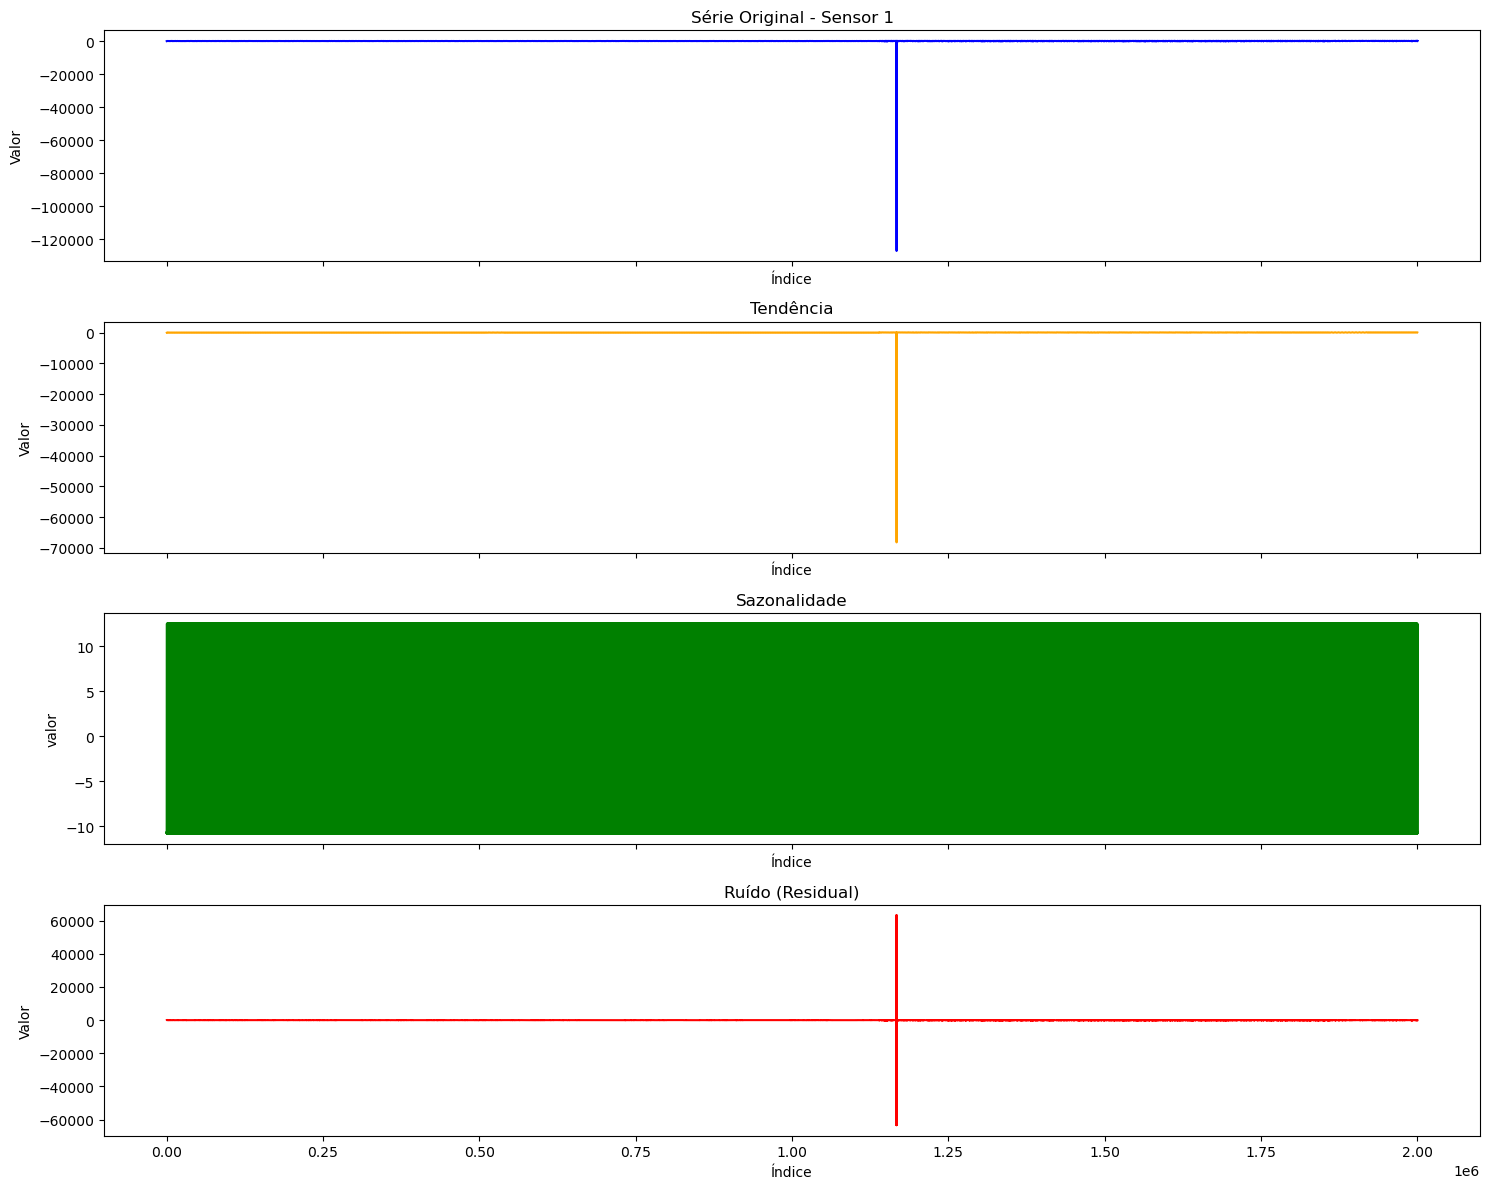

In [4]:
# Selecionar os dados do Sensor 1
sensor = 1
sensor_index = sensor - 1

# Selecionar os dados do Sensor 1
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 1
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 1.4 Verificação da sazonalidade em diferentes regiões do sinal

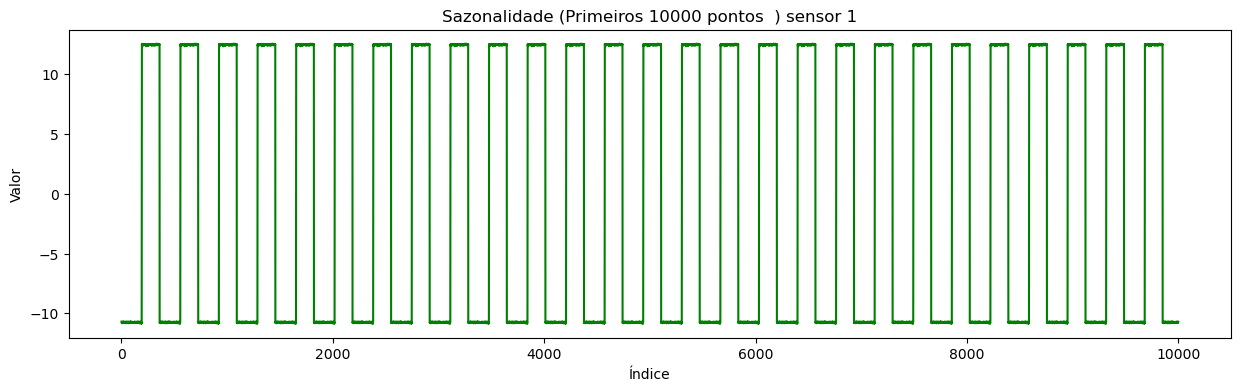

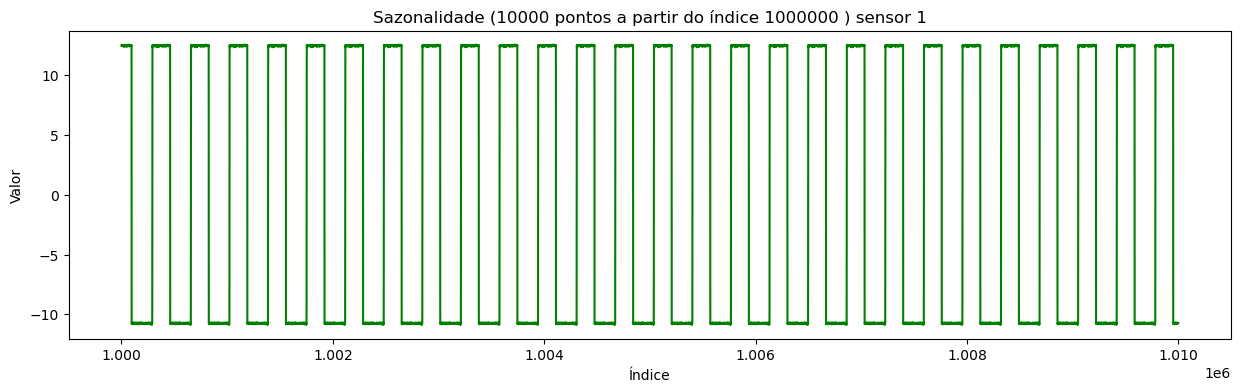

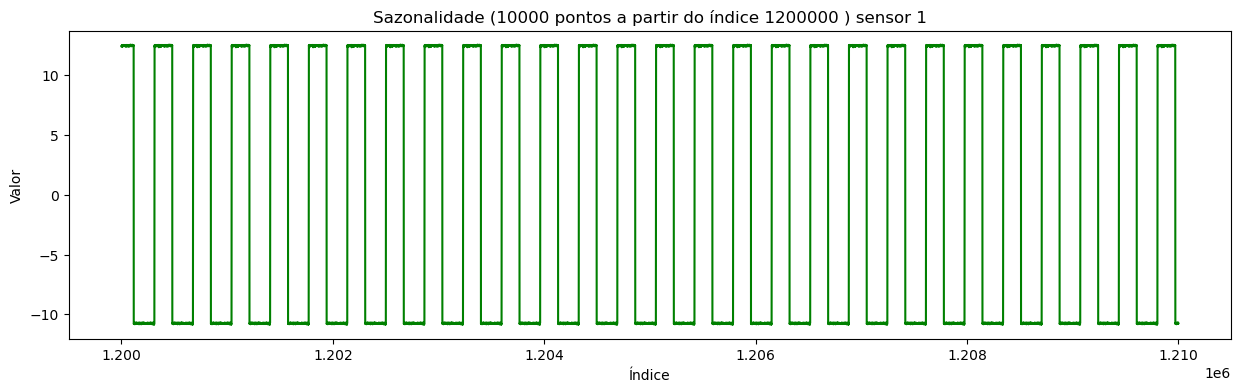

In [5]:
# Plotando a sazonalidade (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a sazonalidade (exibindo a partir do índice 1000000 por 10000 pontos)
index_start_saz = 1000000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1200000 por 10000 pontos)
index_start_saz = 1200000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()



## 1.5   Verificação do ruído. Enquanto a sazonalidade parece manter o mesmo padrão da série original, O ruído demonstra alteração

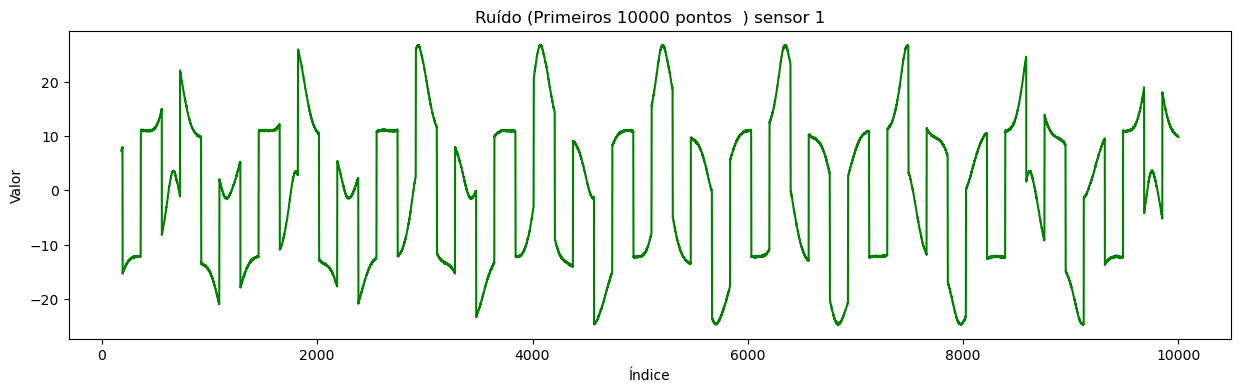

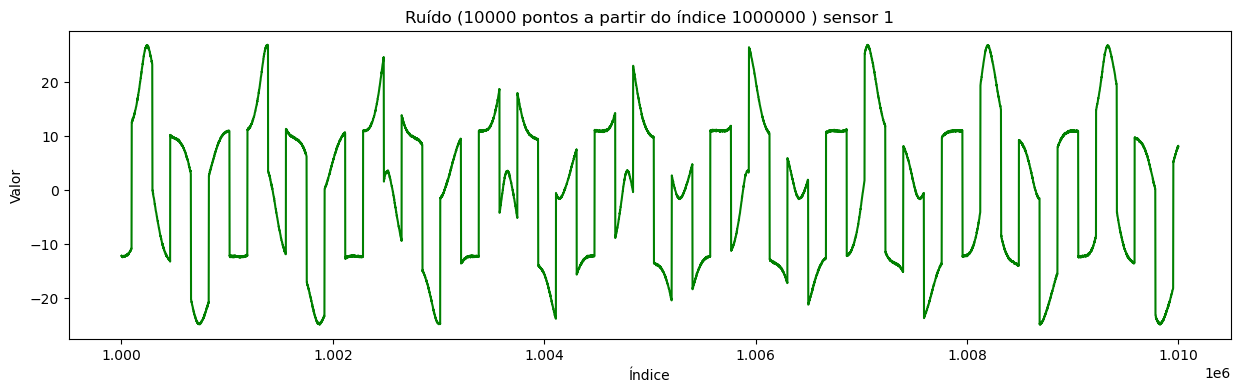

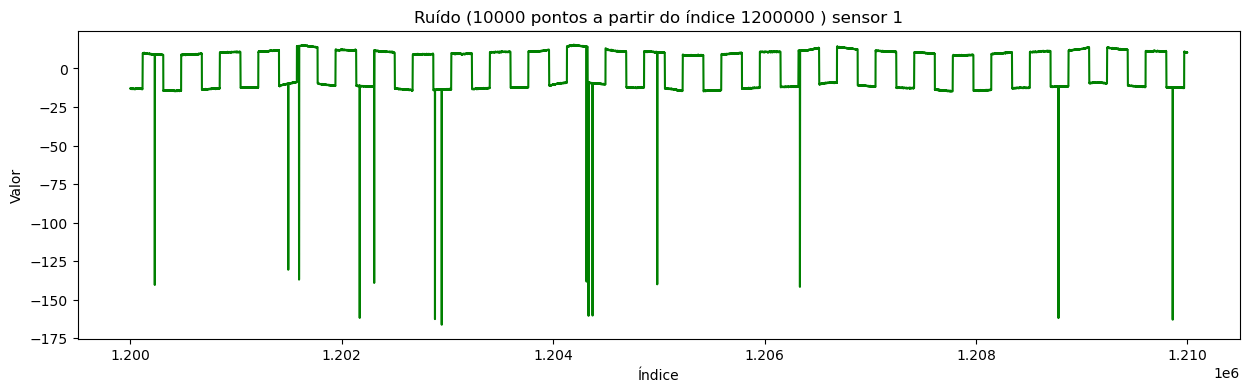

In [6]:
# Plotando a Ruído (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a Ruído (exibindo a partir do índice 1000000 por 10000 pontos)
index_start_saz = 1000000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1200000 por 10000 pontos)
index_start_saz = 1200000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

## 1.6 Aplicação do algoritmo para detectar anomalias usando a componente do ruído

Resíduos: [7.22857357 7.22857357 7.22857357 7.22857357 7.22857357 7.22857357
 7.22857357 7.22857357 7.22857357 7.22857357]
Anomaly Scores: [1.39551352 1.39551352 1.39551352 1.39551352 1.39551352 1.39551352
 1.39551352 1.39551352 1.39551352 1.39551352]
Anomaly Probabilities: [0.80147099 0.80147099 0.80147099 0.80147099 0.80147099 0.80147099
 0.80147099 0.80147099 0.80147099 0.80147099]
Anomalies Detected: [1166719 1166720 1166721 1166722 1166723 1166724 1166725 1166726 1166727
 1166728 1166729 1166730 1166731 1166732 1166733 1166734 1166735 1166736
 1166737 1166738 1166739 1166740 1166741 1166742 1166743 1166744 1166745
 1166746 1166747 1166748 1166749 1166750 1166751 1166752 1166753 1166754
 1166755 1166756 1166757 1166758 1166759 1166760 1166761 1166762 1166763
 1166764 1166765 1166766 1166767 1166768 1166769 1166770 1166771 1166772
 1166773 1166774 1166775 1166776 1166777 1166778 1166779 1166780 1166781
 1166782 1166783 1166784 1166785 1166786 1166787 1166788 1166789 1166790
 1166791

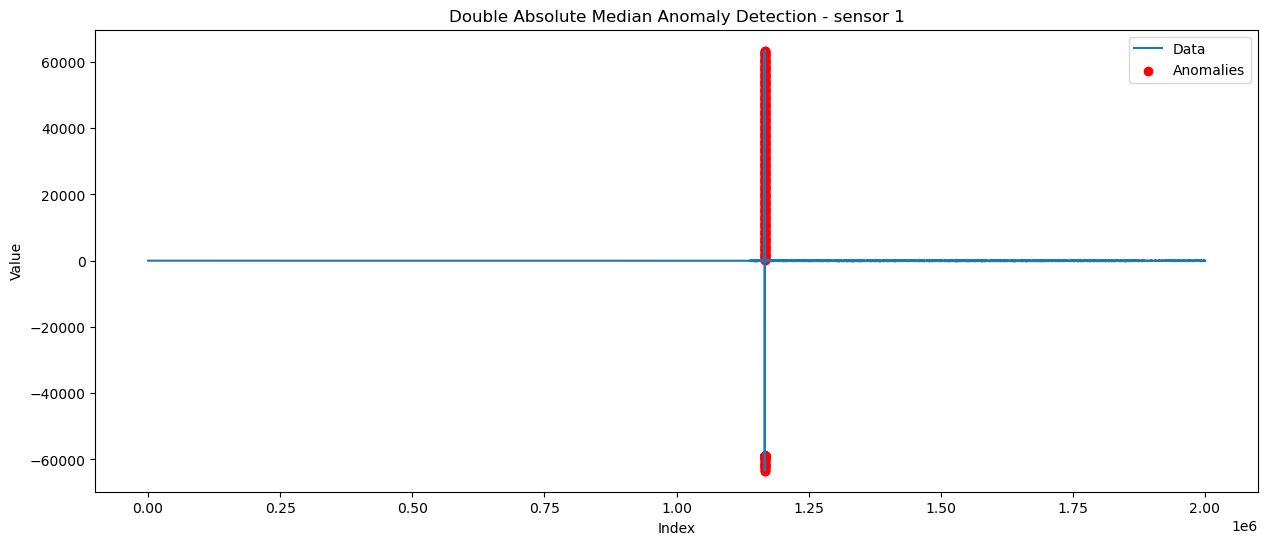

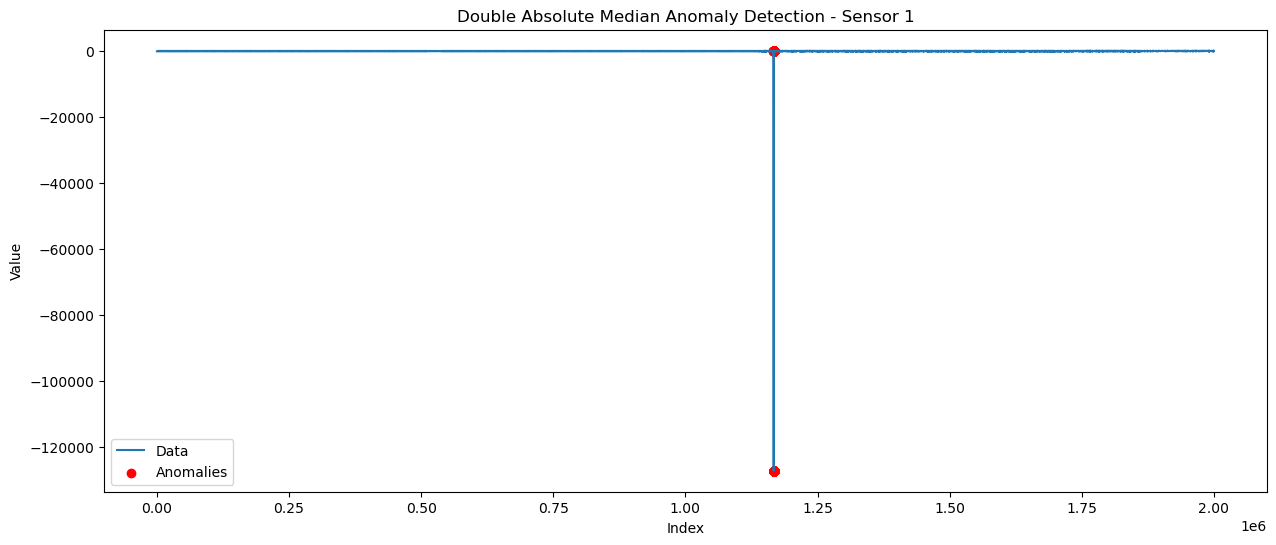

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def double_absolute_median_anomaly_detection(data, threshold=3.5):
    # Calcula a mediana dos dados
    median = np.median(data)

    # Calcula os desvios absolutos da primeira mediana
    first_mad_deviation = np.abs(data - median)

    # Calcula a mediana dos desvios absolutos
    second_median = np.median(first_mad_deviation)

    # Calcula o desvio absoluto da segunda mediana
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Calcula a pontuação de anomalia
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Detecta anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score


# Preenchendo os NaNs em result.resid usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Certifique-se de que todos os NaNs foram preenchidos
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extrair somente os valores, ignorando o índice de datas
resid_values = result_resid_filled.values

# Detectar anomalias
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values)

# Converter anomaly_score para probabilidades usando a função sigmoide
anomaly_probabilities = sigmoid(anomaly_score)

# Aplicar o filtro adicional ao plotar as anomalias
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 1.0))[0]

# Verificar os resultados intermediários
print("Resíduos:", resid_values[:10])
print("Anomaly Scores:", anomaly_score[:10])
print("Anomaly Probabilities:", anomaly_probabilities[:10])
print("Anomalies Detected:", anomaly_indices)



# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(resid_values, label='Data')
plt.scatter(anomaly_indices, resid_values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotar os resultados com os dados originais
plt.figure(figsize=(15, 6))
plt.plot(sensor_data_sample.values, label='Data')
plt.scatter(anomaly_indices, sensor_data_sample.values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - Sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# **Análise do sensor 2**

## 2.1 Seleção do sensor 2, decomposição do sinal, plotagem do sinal e dos 3 componentes.

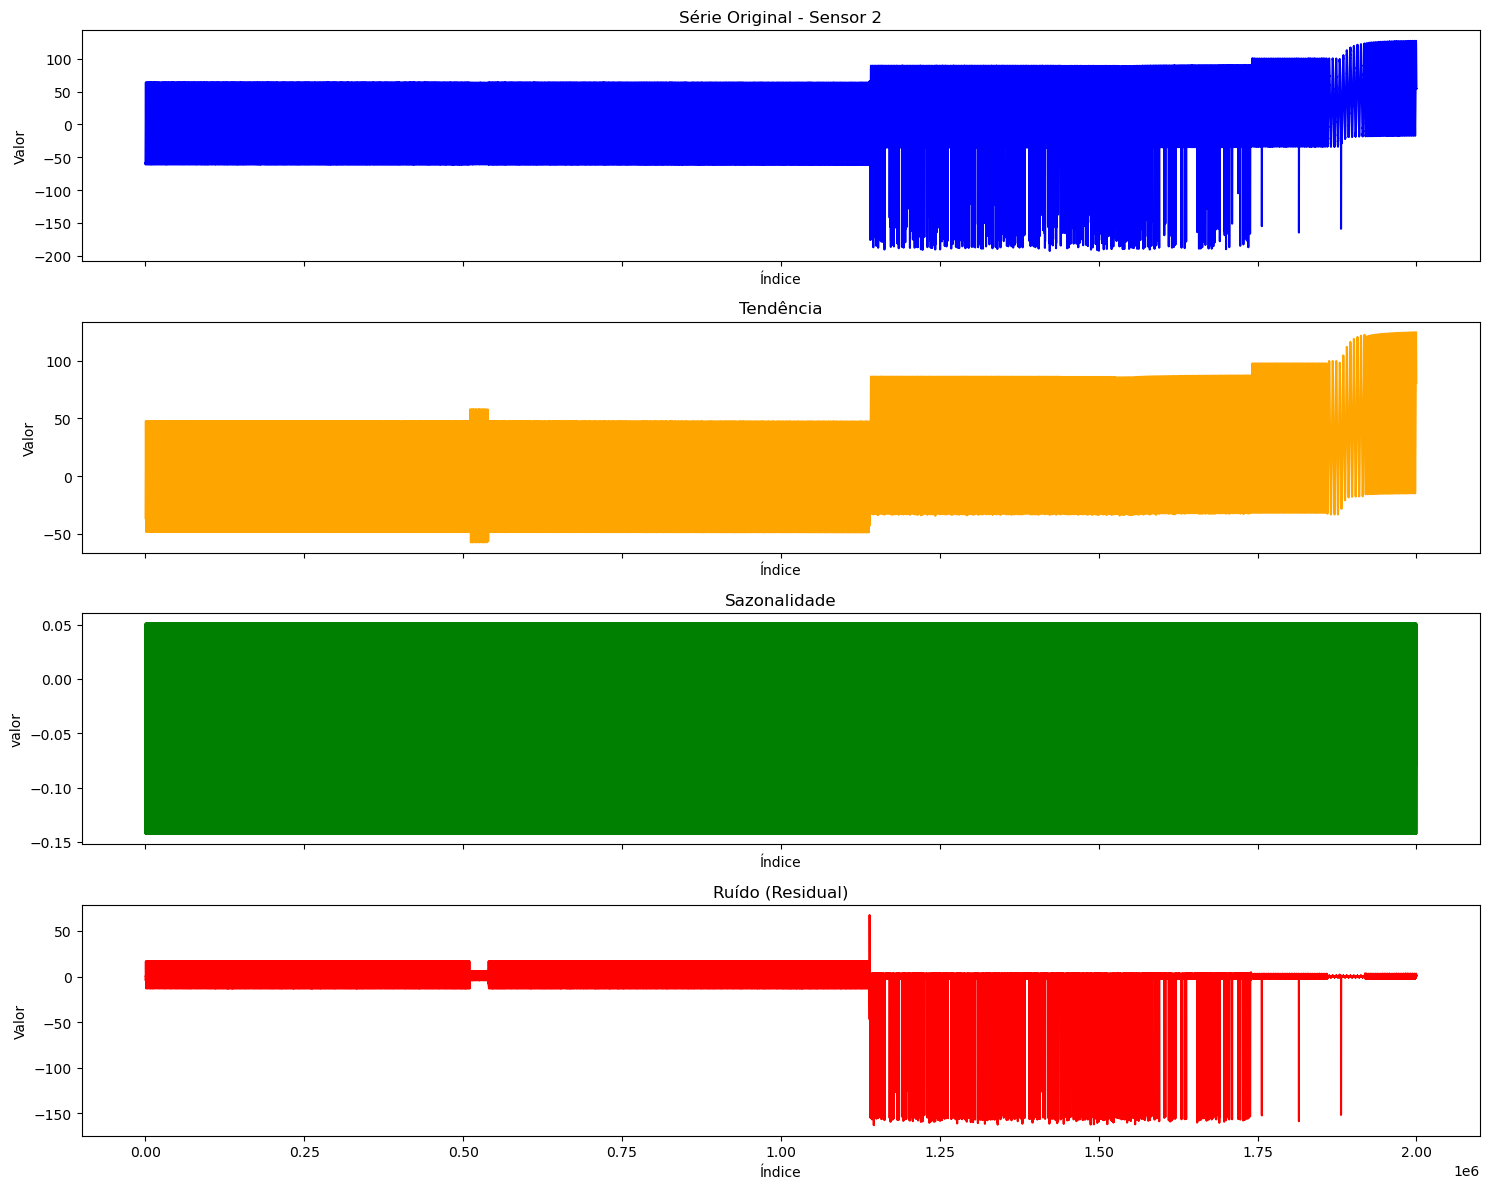

In [8]:
# Selecionar os dados do Sensor 2
sensor = 2
sensor_index = sensor - 1

# Selecionar os dados do Sensor 2
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 2
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 2.2 Verificação da sazonalidade




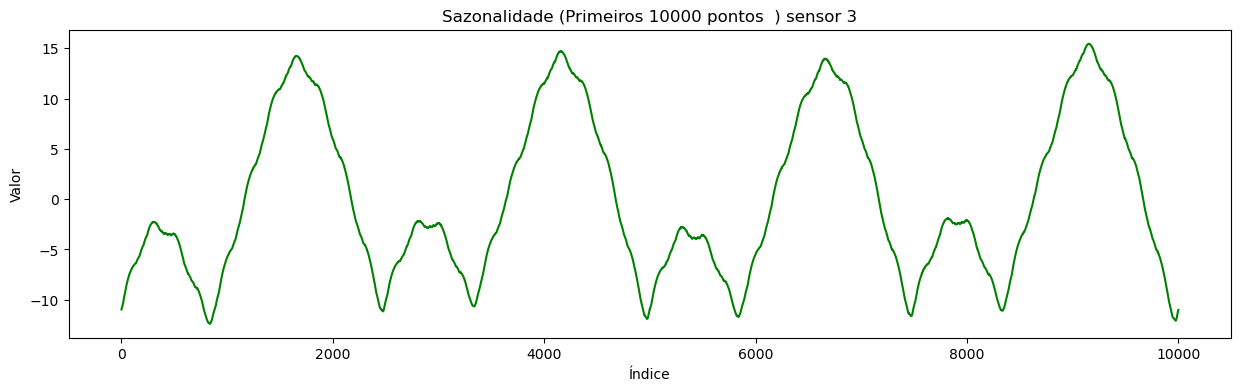

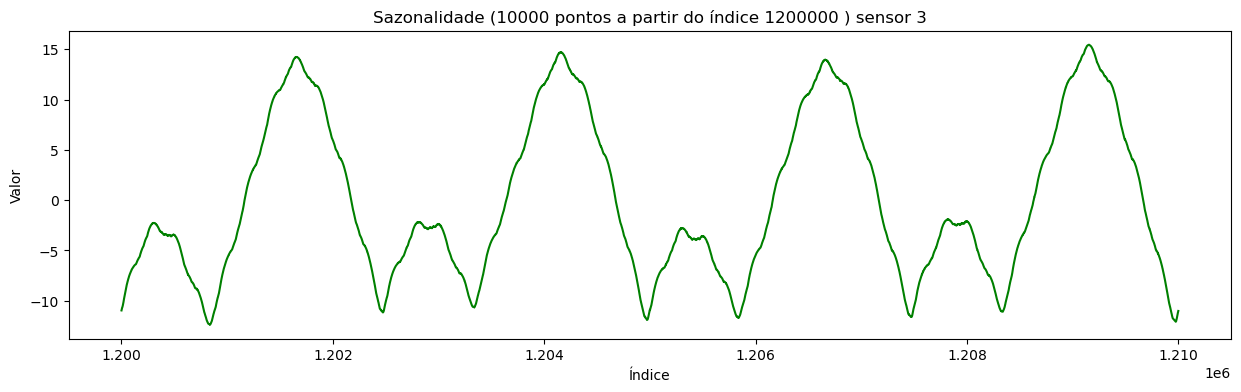

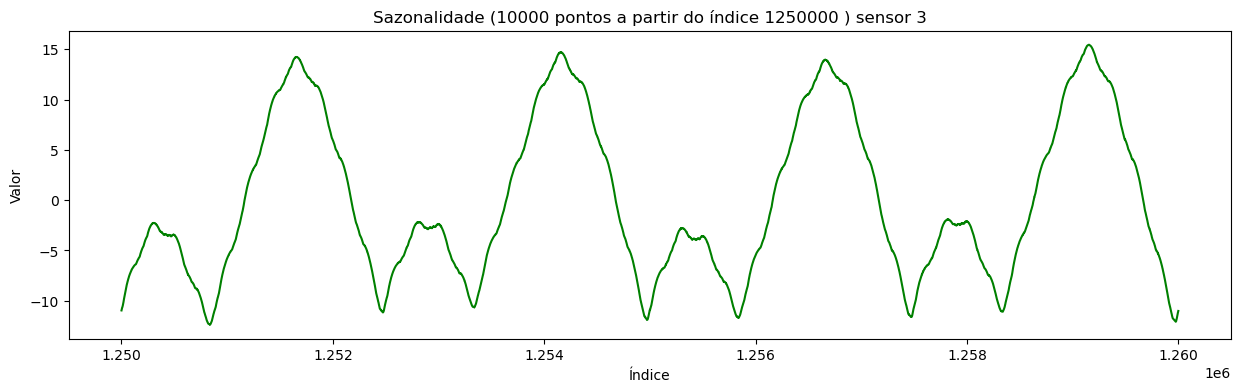

In [30]:
# Plotando a sazonalidade (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a sazonalidade (exibindo a partir do índice 1200000 por 10000 pontos)
index_start_saz = 1200000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1250000 por 10000 pontos)
index_start_saz = 1250000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


### 2.3  Verificação do ruído. Enquanto a sazonalidade parece manter o mesmo padrão da série original, O ruído demonstra alteração

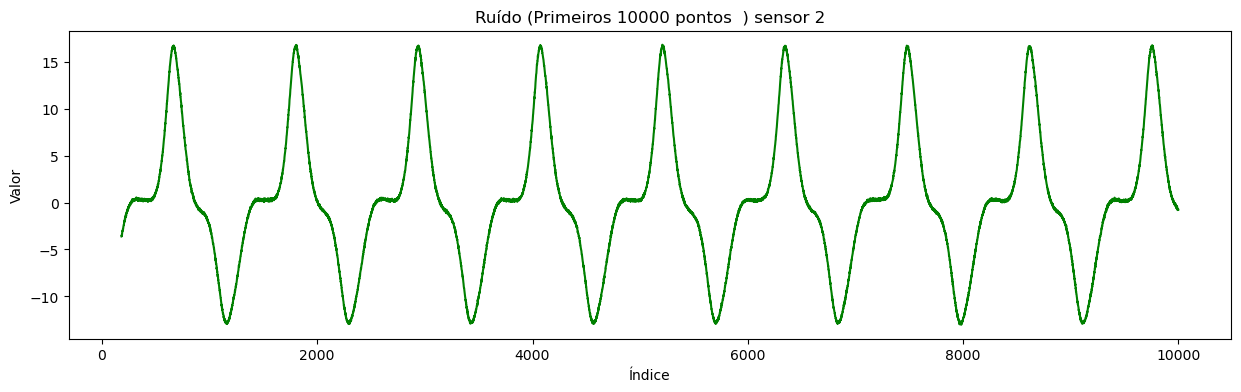

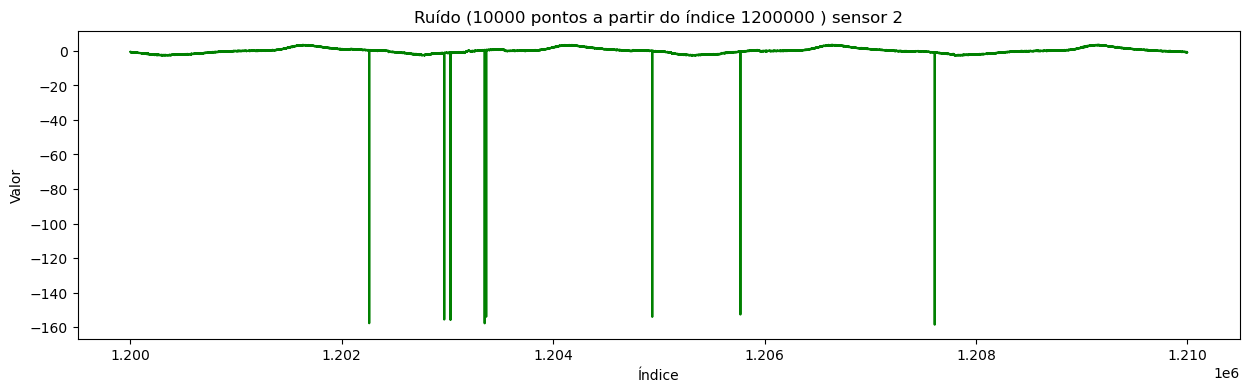

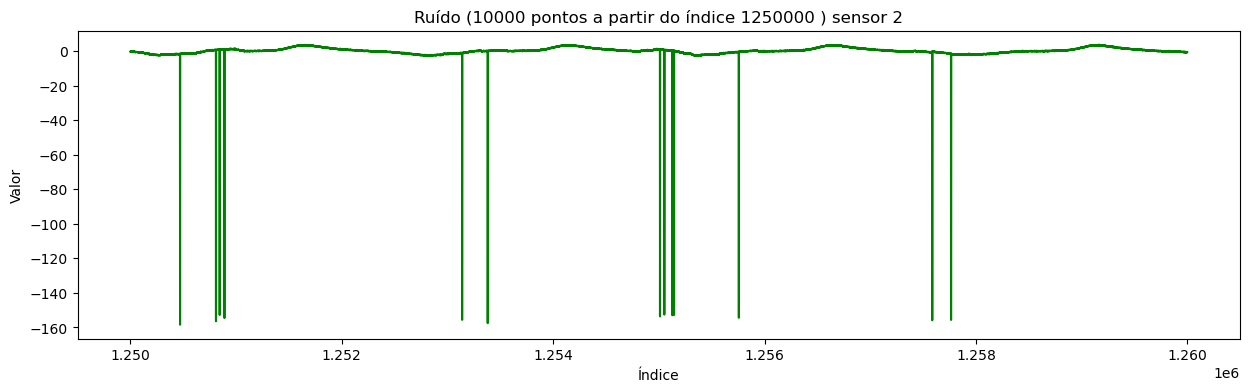

In [10]:
# Plotando a Ruído (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a Ruído (exibindo a partir do índice 1200000 por 10000 pontos)
index_start_saz = 1200000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1250000 por 10000 pontos)
index_start_saz = 1250000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


##2.4 Aplicação do Algoritmo de Detecção de Anomalias

Resíduos: [-3.61537776 -3.61537776 -3.61537776 -3.61537776 -3.61537776 -3.61537776
 -3.61537776 -3.61537776 -3.61537776 -3.61537776]
Anomaly Scores: [1.81856444 1.81856444 1.81856444 1.81856444 1.81856444 1.81856444
 1.81856444 1.81856444 1.81856444 1.81856444]
Anomaly Probabilities: [0.86039378 0.86039378 0.86039378 0.86039378 0.86039378 0.86039378
 0.86039378 0.86039378 0.86039378 0.86039378]
Anomalies Detected: [1139479 1139480 1139481 1139482 1139483 1139484 1139485 1139486 1139487
 1139488]


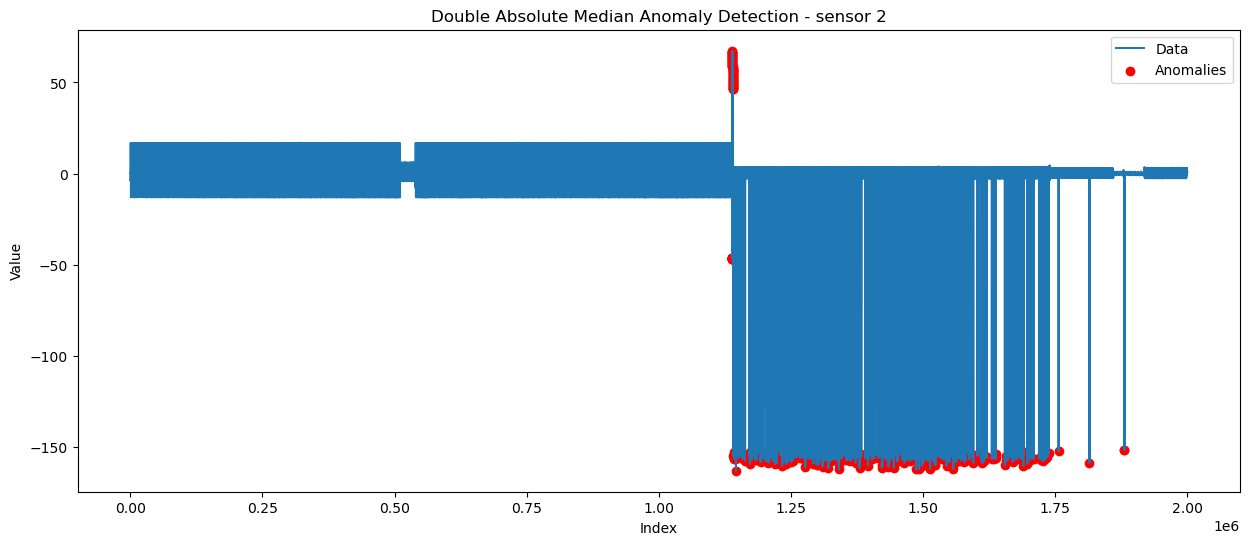

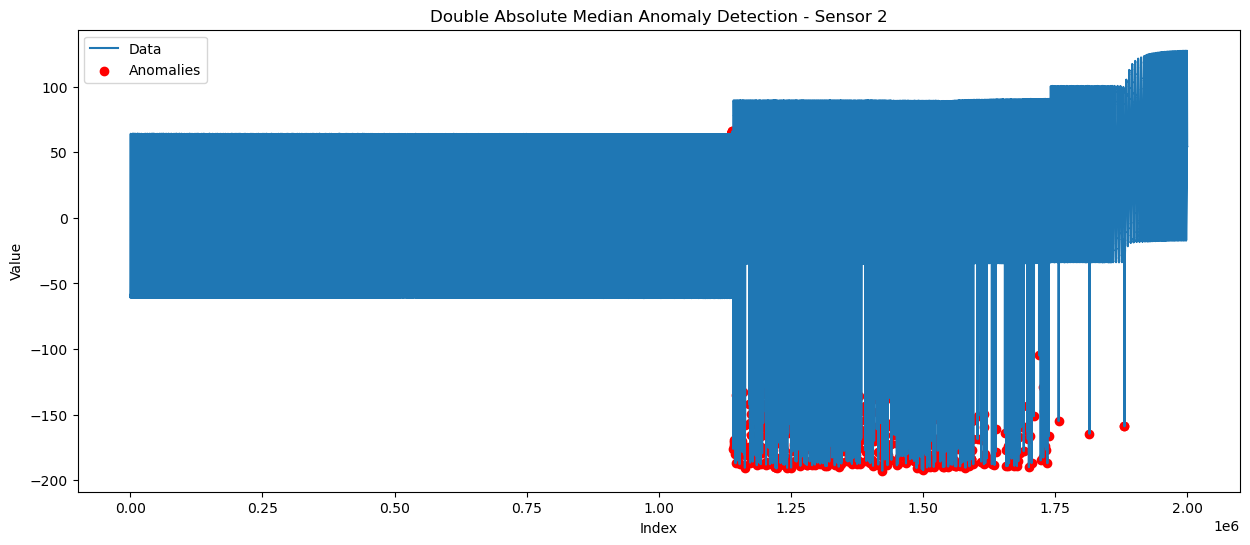

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def double_absolute_median_anomaly_detection(data, threshold=3.5):
    # Calcula a mediana dos dados
    median = np.median(data)

    # Calcula os desvios absolutos da primeira mediana
    first_mad_deviation = np.abs(data - median)

    # Calcula a mediana dos desvios absolutos
    second_median = np.median(first_mad_deviation)

    # Calcula o desvio absoluto da segunda mediana
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Calcula a pontuação de anomalia
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Detecta anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score


# Preenchendo os NaNs em result.resid usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Certifique-se de que todos os NaNs foram preenchidos
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extrair somente os valores, ignorando o índice de datas
resid_values = result_resid_filled.values

# Detectar anomalias
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values)

# Converter anomaly_score para probabilidades usando a função sigmoide
anomaly_probabilities = sigmoid(anomaly_score)

# Aplicar o filtro adicional ao plotar as anomalias
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 1.0))[0]

# Verificar os resultados intermediários
print("Resíduos:", resid_values[:10])
print("Anomaly Scores:", anomaly_score[:10])
print("Anomaly Probabilities:", anomaly_probabilities[:10])
print("Anomalies Detected:", anomaly_indices[:10])



# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(resid_values, label='Data')
plt.scatter(anomaly_indices, resid_values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotar os resultados com os dados originais
plt.figure(figsize=(15, 6))
plt.plot(sensor_data_sample.values, label='Data')
plt.scatter(anomaly_indices, sensor_data_sample.values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - Sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Análise do sensor 3**

## 3.1 Seleção do sensor 2, decomposição do sinal, plotagem do sinal e dos 3 componentes.

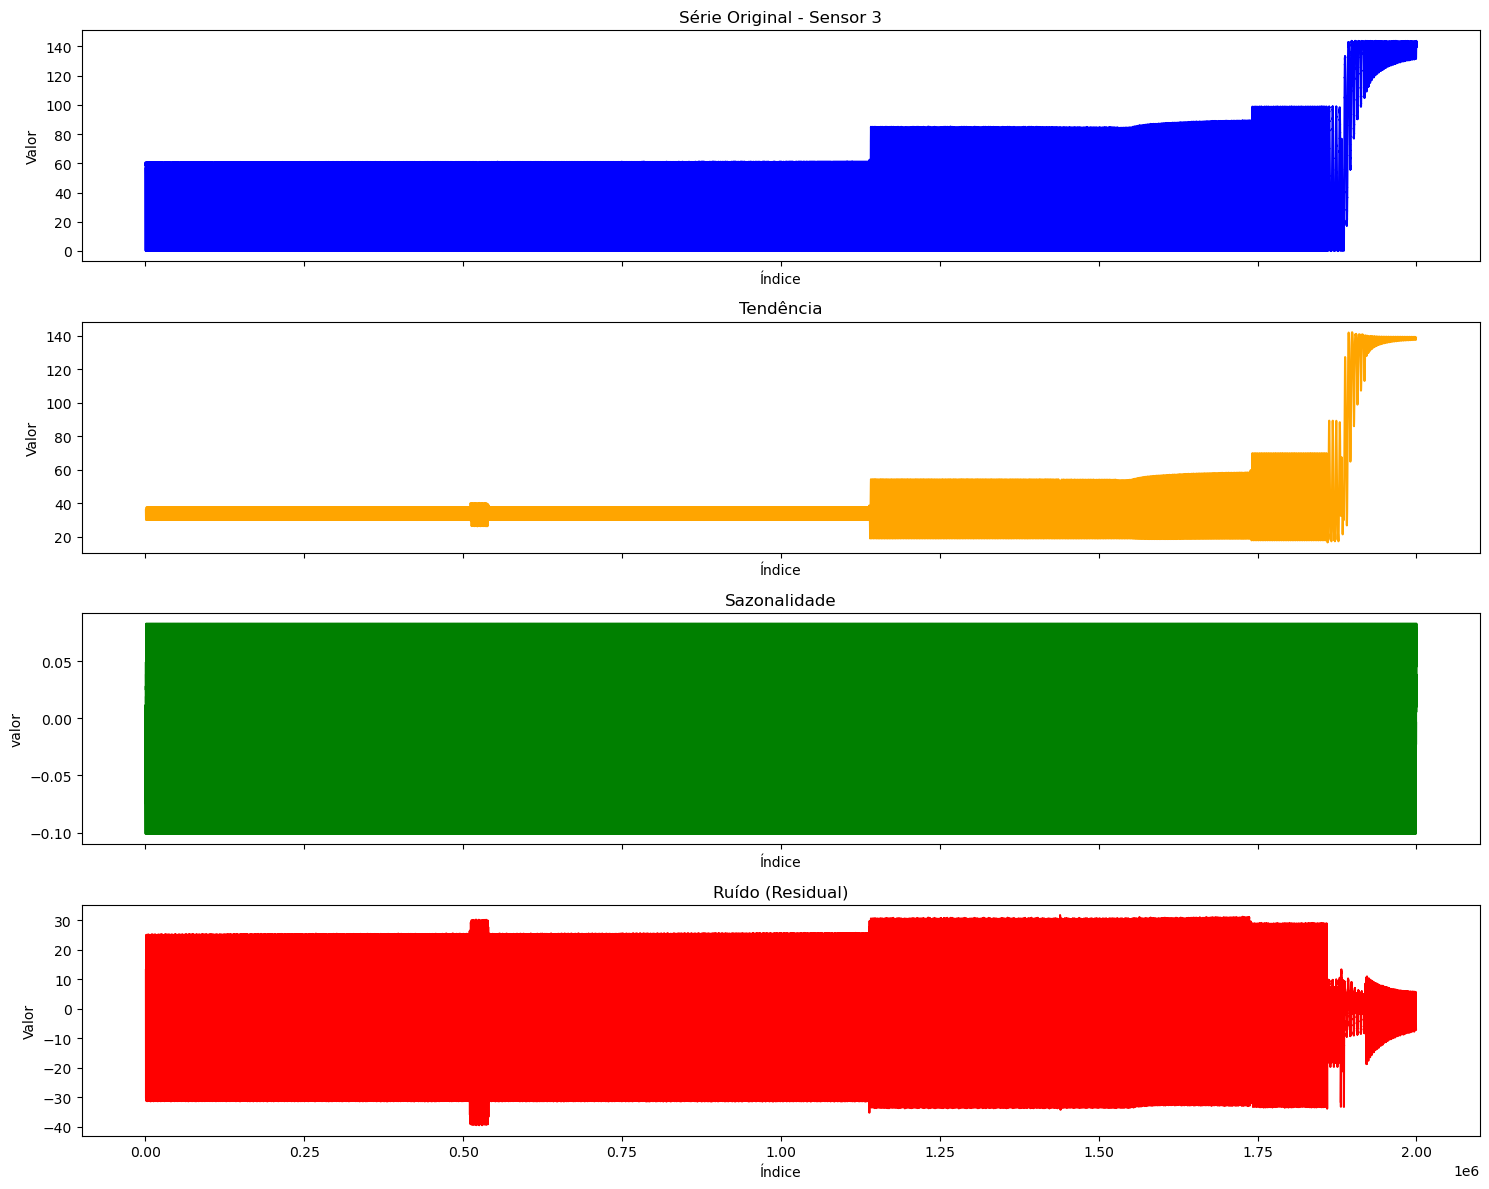

In [104]:
# Selecionar os dados do Sensor 3
sensor = 3
sensor_index = sensor - 1

# Selecionar os dados do Sensor 3
sensor_data_sample = abs(sensor_data.iloc[:, sensor_index])

# Decompor os dados do Sensor 3
result = seasonal_decompose(sensor_data_sample, model='additive', period=1440)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 3.2 Verificação da sazonalidade


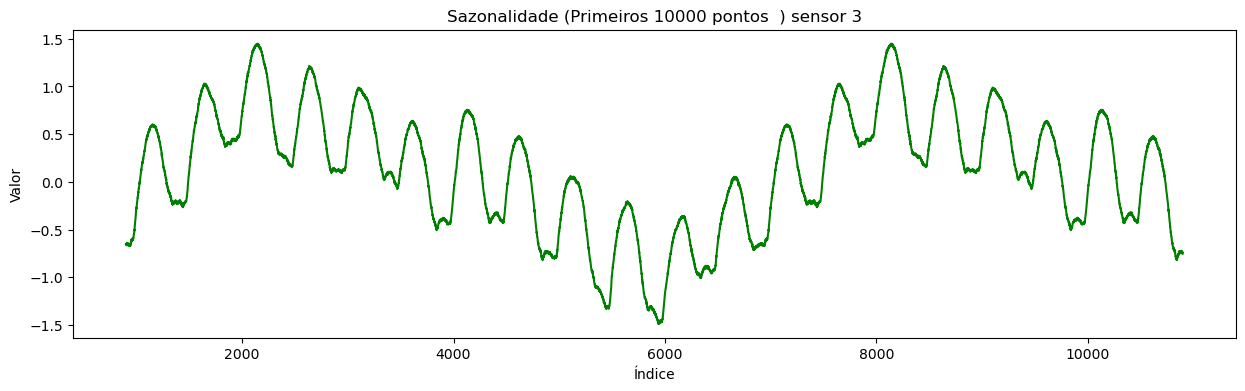

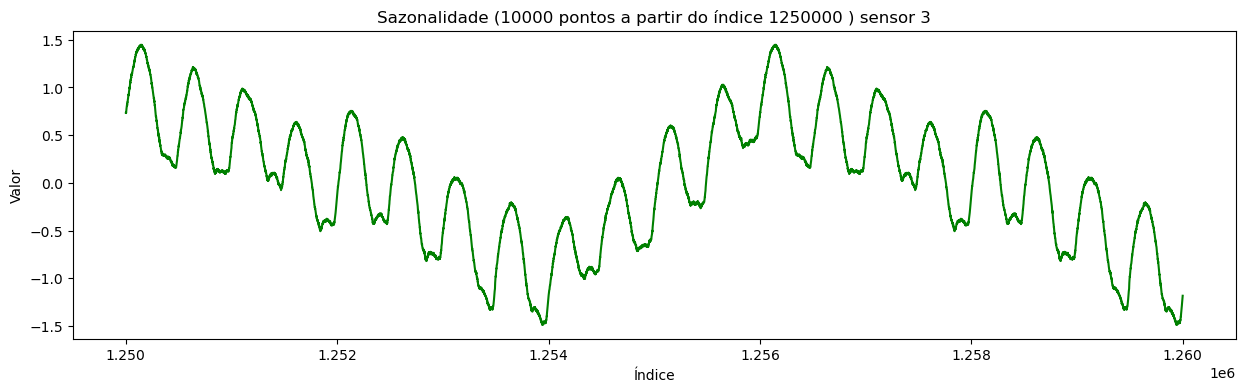

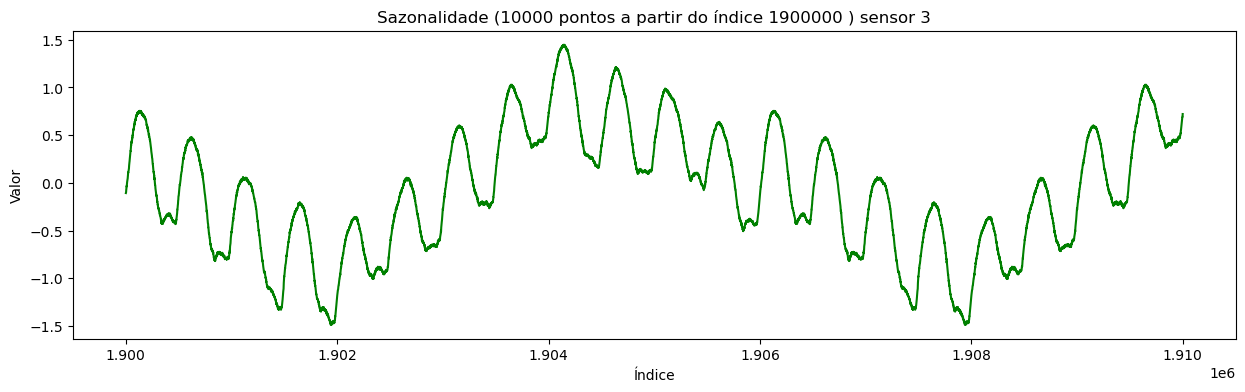

In [93]:
# Plotando a sazonalidade (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 900
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a sazonalidade (exibindo a partir do índice 1250000 por 10000 pontos)
index_start_saz = 1250000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1900000 por 10000 pontos)
index_start_saz = 1900000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


### 3.3  Verificação do ruído. Enquanto a sazonalidade parece manter o mesmo padrão da série original, O ruído demonstra alteração

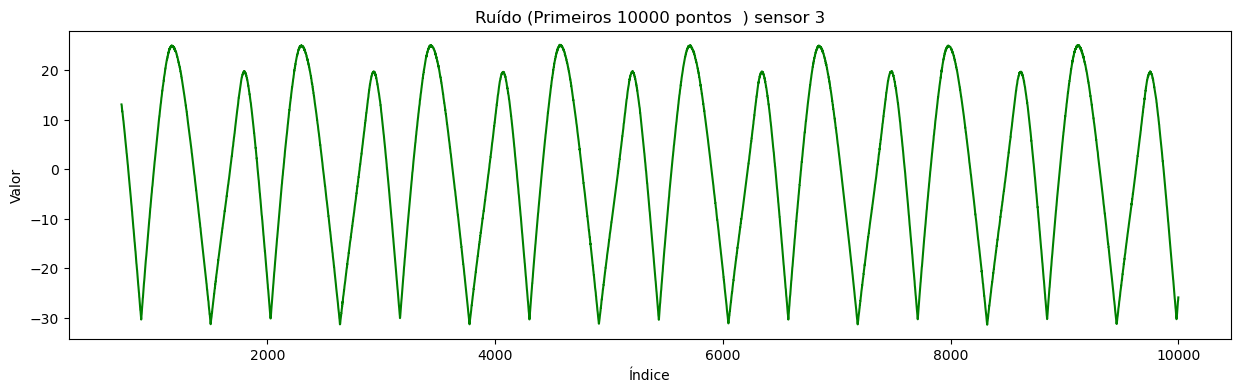

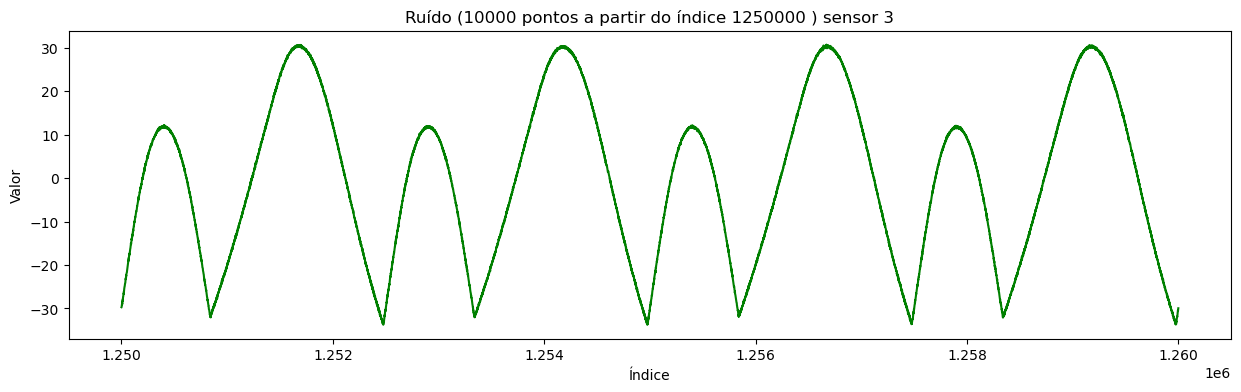

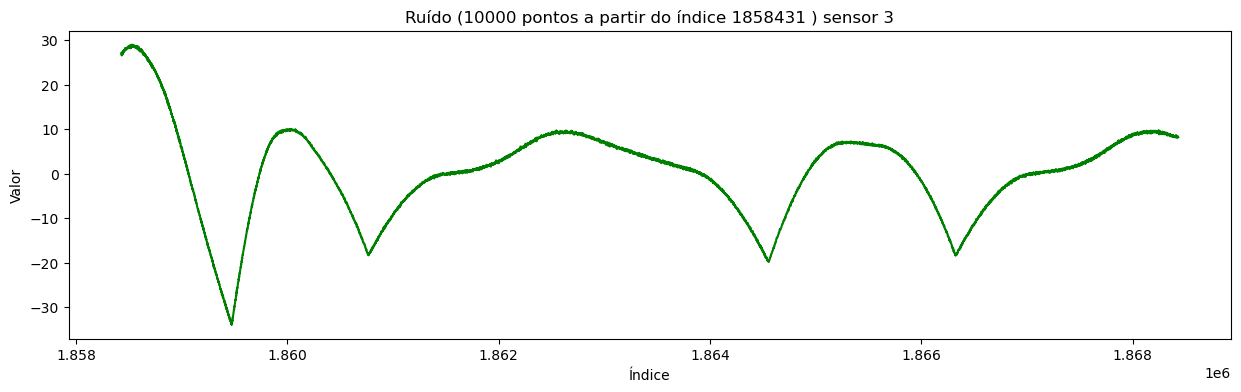

In [106]:
# Plotando a Ruído (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a Ruído (exibindo a partir do índice 1250000 por 10000 pontos)
index_start_saz = 1250000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1900000 por 10000 pontos)
index_start_saz = 1858431
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


## 3.4 Aplicação do Algoritmo de Detecção de Anomalias

Resíduos: [13.0744729 13.0744729 13.0744729 13.0744729 13.0744729 13.0744729
 13.0744729 13.0744729 13.0744729 13.0744729]
Anomaly Scores: [0.19563041 0.19563041 0.19563041 0.19563041 0.19563041 0.19563041
 0.19563041 0.19563041 0.19563041 0.19563041]
Anomaly Probabilities: [0.54875222 0.54875222 0.54875222 0.54875222 0.54875222 0.54875222
 0.54875222 0.54875222 0.54875222 0.54875222]
Anomalies Detected: []


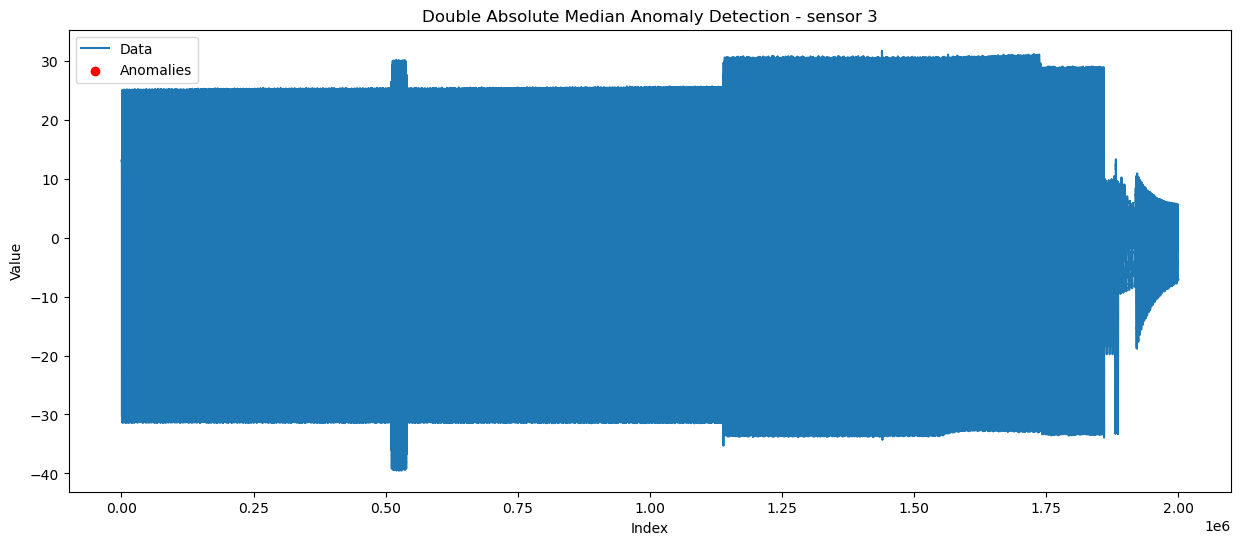

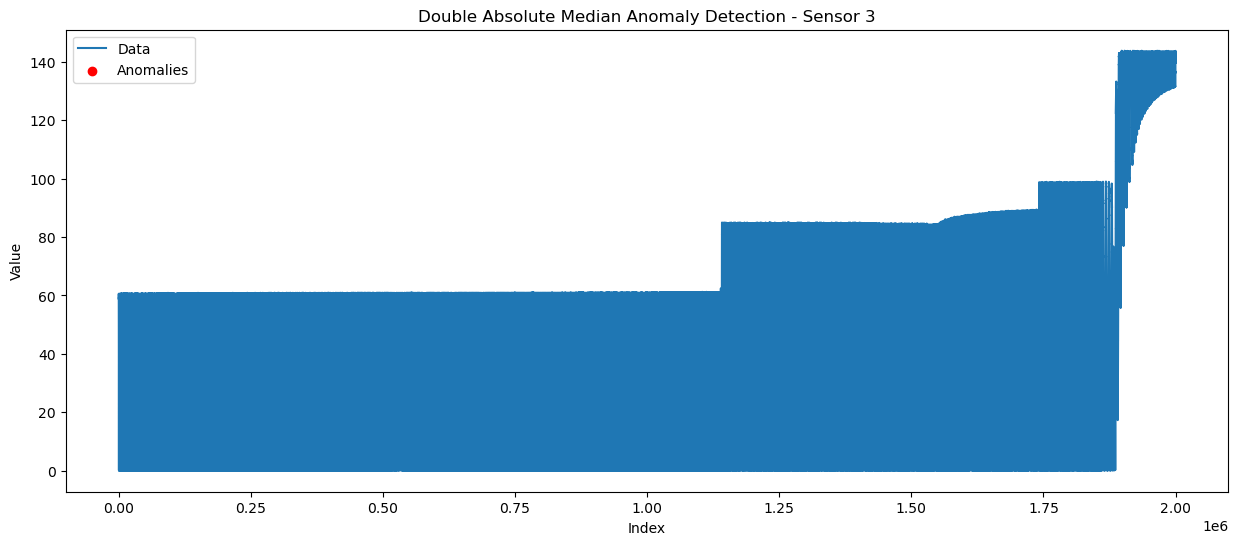

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1500x600 with 0 Axes>

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_transformation(x, scale=1, offset=0):
    """ Apply logistic transformation to enhance anomaly score sensitivity. """
    return 1 / (1 + np.exp(-scale * (x - offset)))

def double_absolute_median_anomaly_detection(data, threshold=3.5):
    # Calcula a mediana dos dados
    median = np.median(data)

    # Calcula os desvios absolutos da primeira mediana
    first_mad_deviation = np.abs(data - median)

    # Calcula a mediana dos desvios absolutos
    second_median = np.median(first_mad_deviation)

    # Calcula o desvio absoluto da segunda mediana
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Calcula a pontuação de anomalia
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Detecta anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score


# Preenchendo os NaNs em result.resid usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Certifique-se de que todos os NaNs foram preenchidos
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extrair somente os valores, ignorando o índice de datas
resid_values = result_resid_filled.values
#resid_values = result.resid.values[100000:]

# Detectar anomalias
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values)

# Converter anomaly_score para probabilidades usando a função sigmoide
anomaly_probabilities = sigmoid(anomaly_score)
#anomaly_probabilities = logistic_transformation(anomaly_score, scale=10, offset=0.5)

# Aplicar o filtro adicional ao plotar as anomalias
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 0.99))[0]

# Verificar os resultados intermediários
print("Resíduos:", resid_values[:10])
print("Anomaly Scores:", anomaly_score[:10])
print("Anomaly Probabilities:", anomaly_probabilities[:10])
print("Anomalies Detected:", anomaly_indices[:10])



# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(resid_values, label='Data')
plt.scatter(anomaly_indices, resid_values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotar os resultados com os dados originais
plt.figure(figsize=(15, 6))
plt.plot(sensor_data_sample.values, label='Data')
plt.scatter(anomaly_indices, sensor_data_sample.values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - Sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(resid_values[anomaly_indices[0]:], label='Data')
plt.scatter(anomaly_indices-anomaly_indices[0], resid_values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotar os resultados com os dados originais
plt.figure(figsize=(15, 6))
plt.plot(sensor_data_sample.values[anomaly_indices[0]:], label='Data')
plt.scatter(anomaly_indices-anomaly_indices[0], sensor_data_sample.values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - Sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Análise do sensor 4**

## 4.1 Seleção do sensor 2, decomposição do sinal, plotagem do sinal e dos 3 componentes.

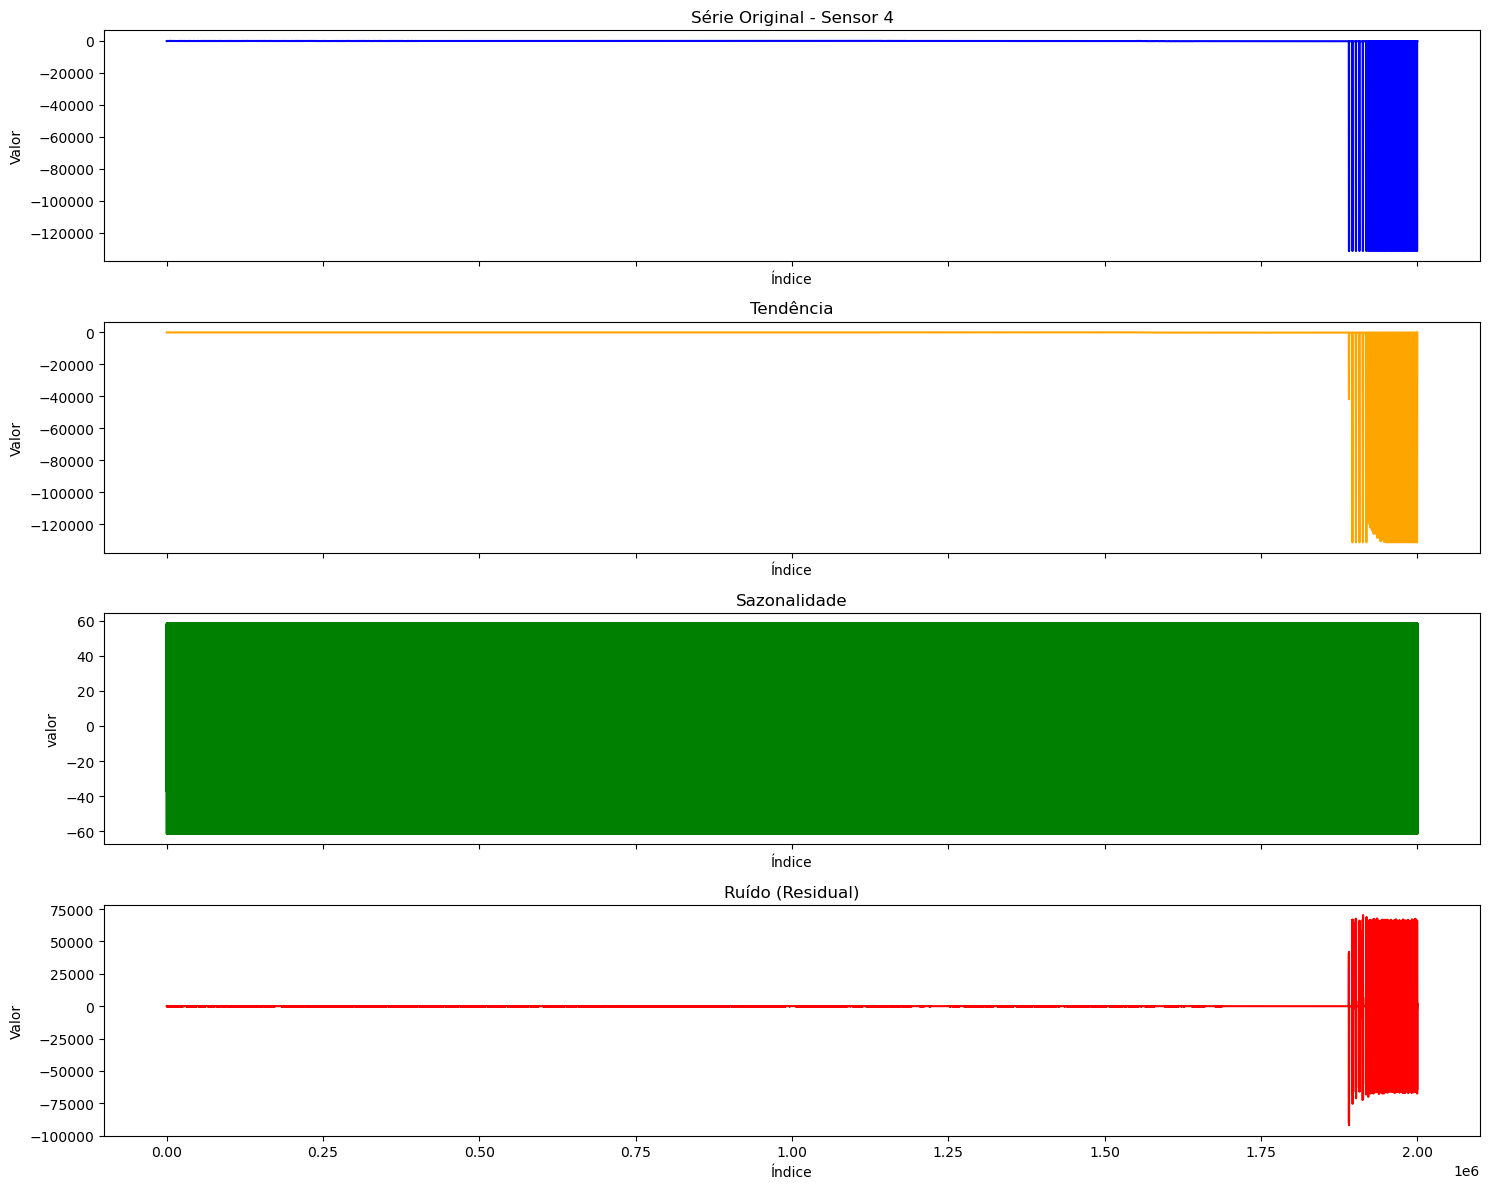

In [80]:
# Selecionar os dados do Sensor 4
sensor = 4
sensor_index = sensor - 1

# Selecionar os dados do Sensor 4
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 4
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 4.2 Verificação da sazonalidade

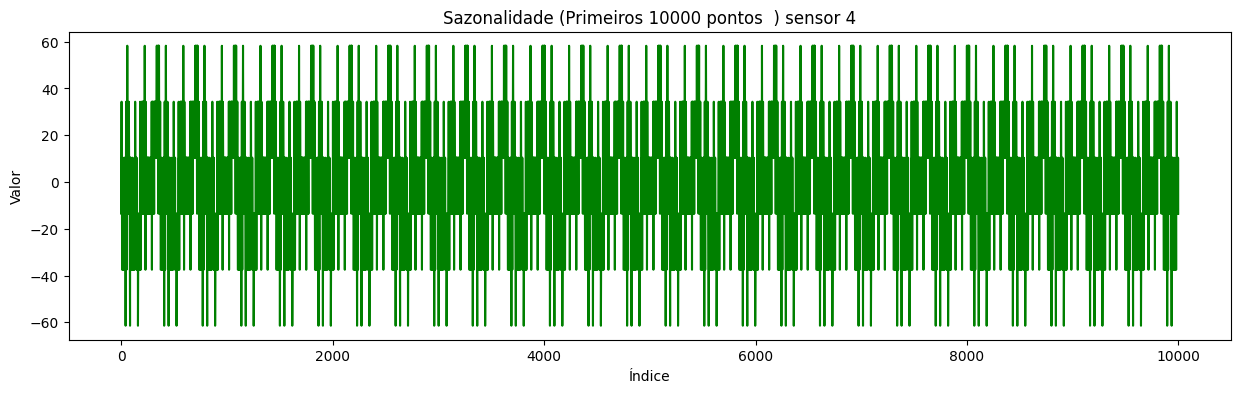

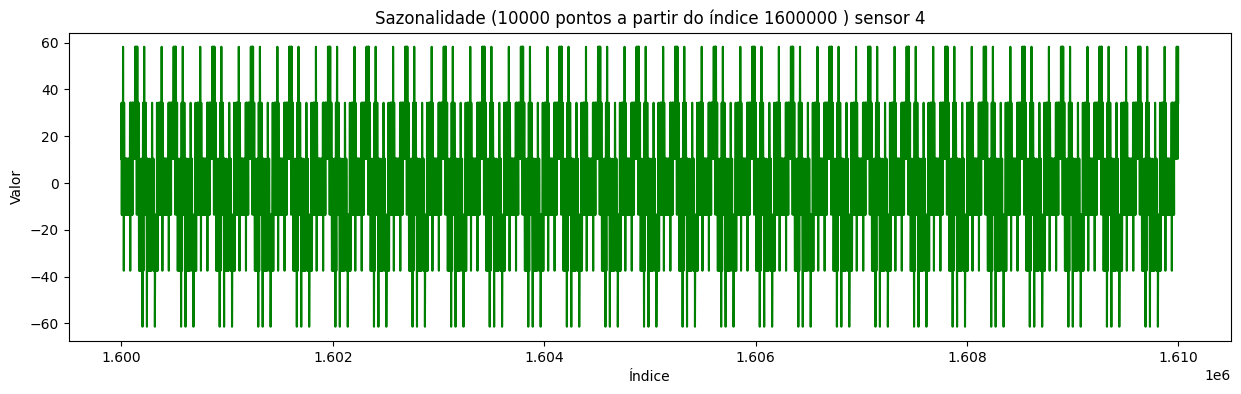

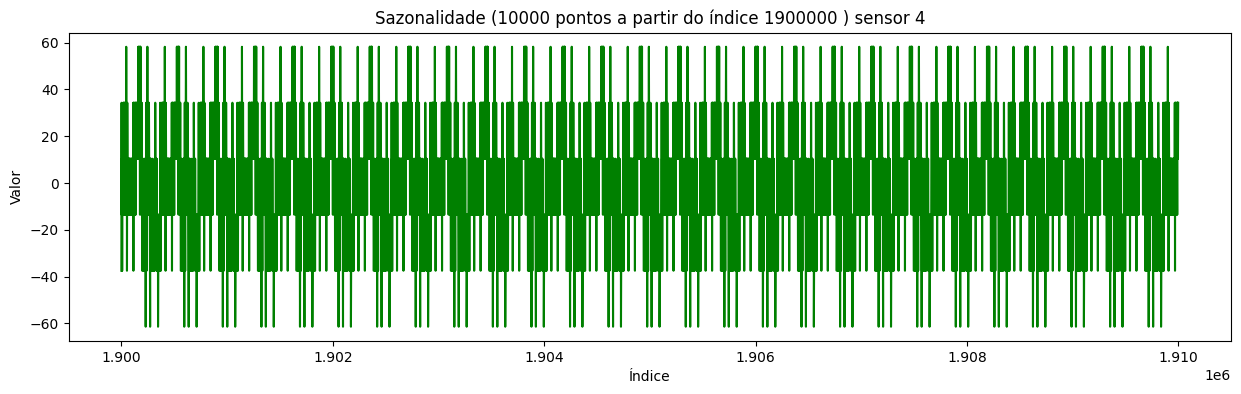

In [30]:
# Plotando a sazonalidade (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a sazonalidade (exibindo a partir do índice 1600000 por 10000 pontos)
index_start_saz = 1600000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1900000 por 10000 pontos)
index_start_saz = 1900000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


##4.3  Verificação do ruído.

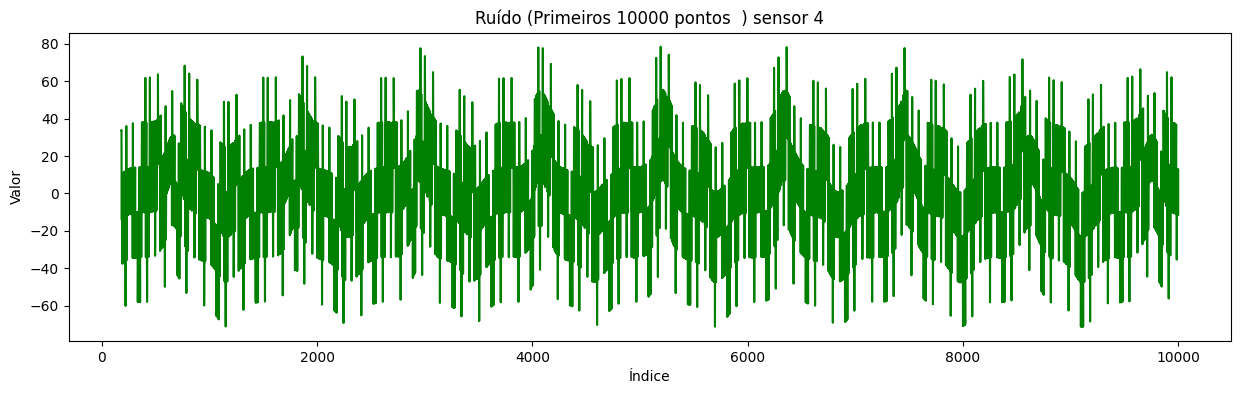

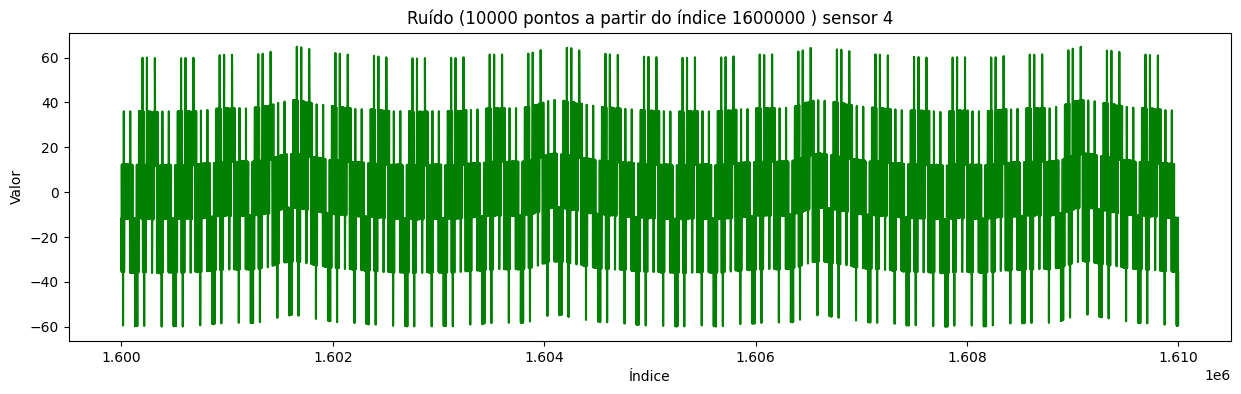

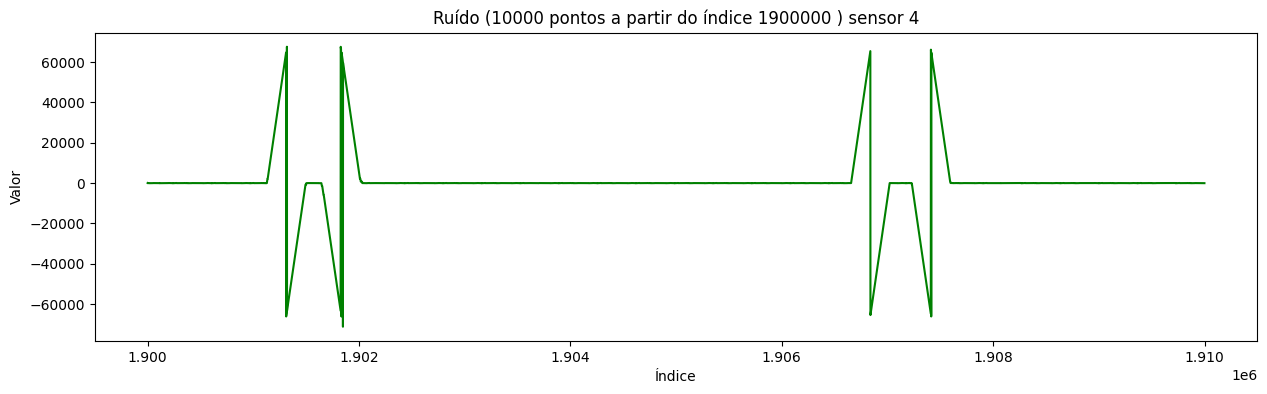

In [31]:
# Plotando a Ruído (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a Ruído (exibindo a partir do índice 1600000 por 10000 pontos)
index_start_saz = 1600000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1900000 por 10000 pontos)
index_start_saz = 1900000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


##4.4 Aplicação do Algoritmo de Detecção de Anomalias

Resíduos: [33.66188317 33.66188317 33.66188317 33.66188317 33.66188317 33.66188317
 33.66188317 33.66188317 33.66188317 33.66188317]
Anomaly Scores: [3.08480039 3.08480039 3.08480039 3.08480039 3.08480039 3.08480039
 3.08480039 3.08480039 3.08480039 3.08480039]
Anomaly Probabilities: [0.9562614 0.9562614 0.9562614 0.9562614 0.9562614 0.9562614 0.9562614
 0.9562614 0.9562614 0.9562614]
Anomalies Detected: [1890191 1890192 1890193 1890194 1890195 1890196 1890197 1890198 1890199
 1890200]


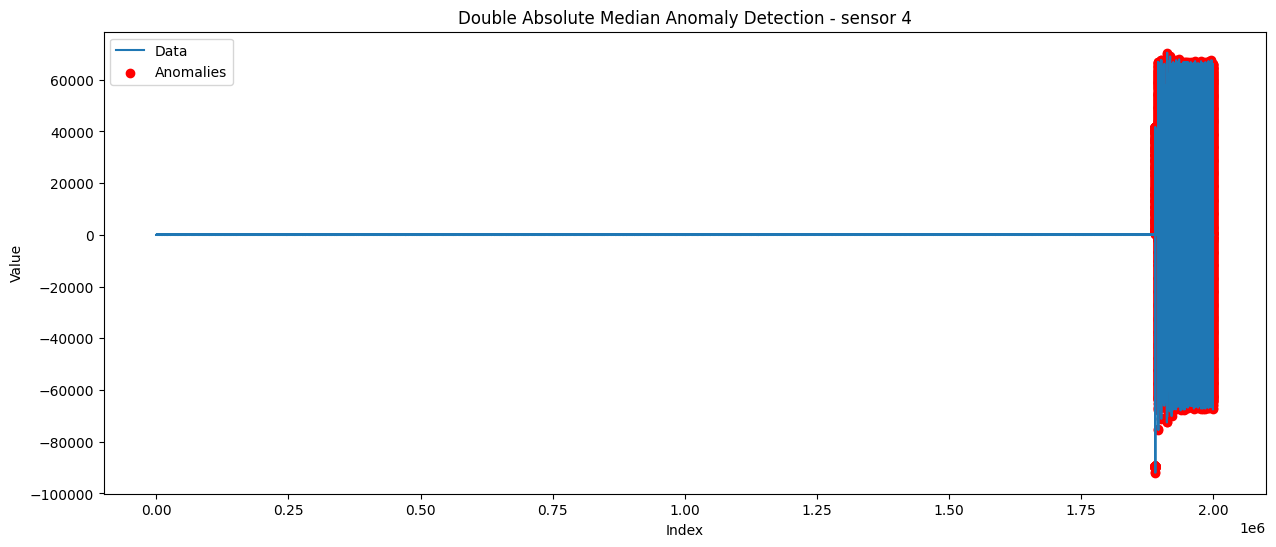

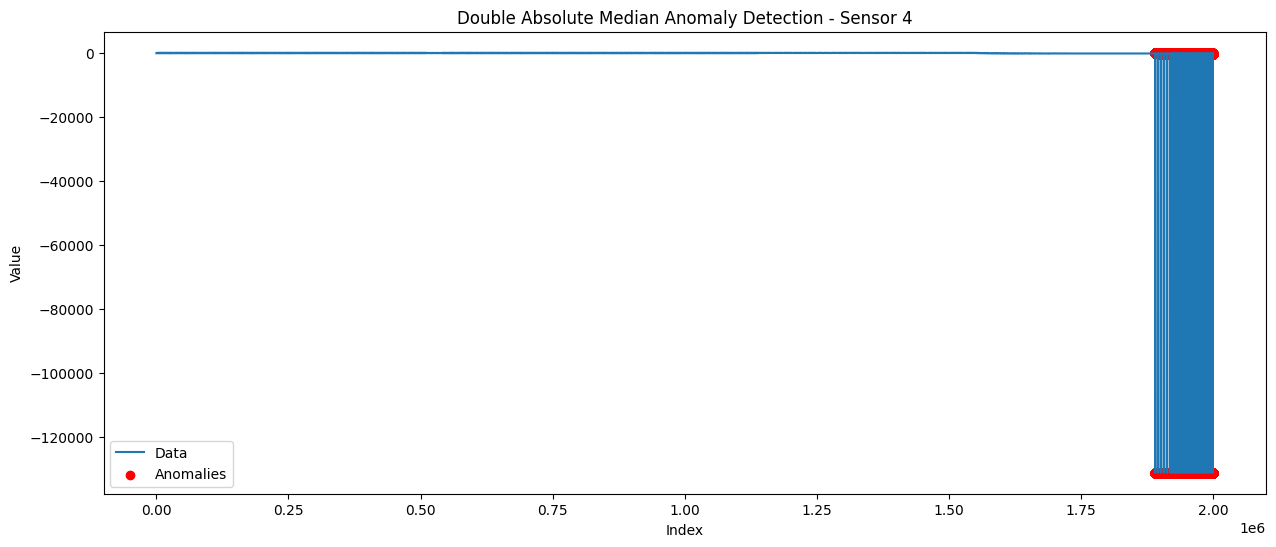

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def double_absolute_median_anomaly_detection(data, threshold=3.5):
    # Calcula a mediana dos dados
    median = np.median(data)

    # Calcula os desvios absolutos da primeira mediana
    first_mad_deviation = np.abs(data - median)

    # Calcula a mediana dos desvios absolutos
    second_median = np.median(first_mad_deviation)

    # Calcula o desvio absoluto da segunda mediana
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Calcula a pontuação de anomalia
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Detecta anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score


# Preenchendo os NaNs em result.resid usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Certifique-se de que todos os NaNs foram preenchidos
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extrair somente os valores, ignorando o índice de datas
resid_values = result_resid_filled.values

# Detectar anomalias
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values)

# Converter anomaly_score para probabilidades usando a função sigmoide
anomaly_probabilities = sigmoid(anomaly_score)

# Aplicar o filtro adicional ao plotar as anomalias
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 1.0))[0]

# Verificar os resultados intermediários
print("Resíduos:", resid_values[:10])
print("Anomaly Scores:", anomaly_score[:10])
print("Anomaly Probabilities:", anomaly_probabilities[:10])
print("Anomalies Detected:", anomaly_indices[:10])



# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(resid_values, label='Data')
plt.scatter(anomaly_indices, resid_values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotar os resultados com os dados originais
plt.figure(figsize=(15, 6))
plt.plot(sensor_data_sample.values, label='Data')
plt.scatter(anomaly_indices, sensor_data_sample.values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - Sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# **Análise do sensor 5**

## 5.1 Seleção do sensor 2, decomposição do sinal, plotagem do sinal e dos 3 componentes.

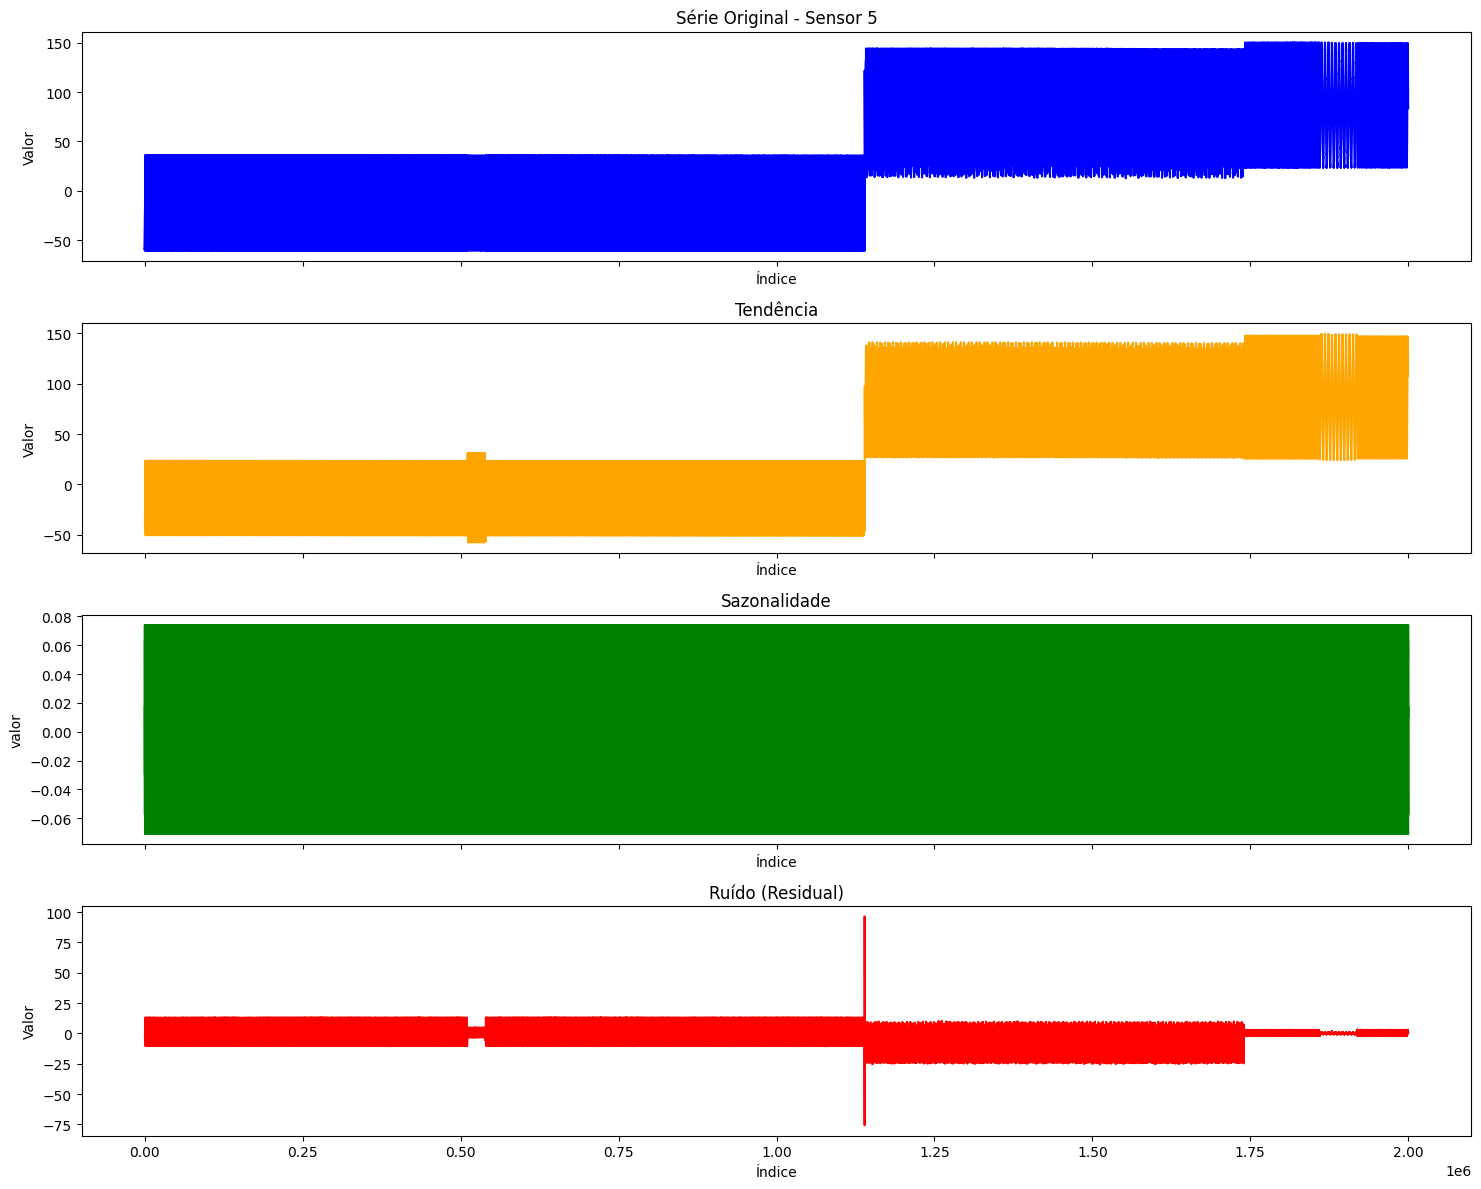

In [33]:
# Selecionar os dados do Sensor 5
sensor = 5
sensor_index = sensor - 1

# Selecionar os dados do Sensor 5
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 5
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()

## 5.2 Verificação da sazonalidade

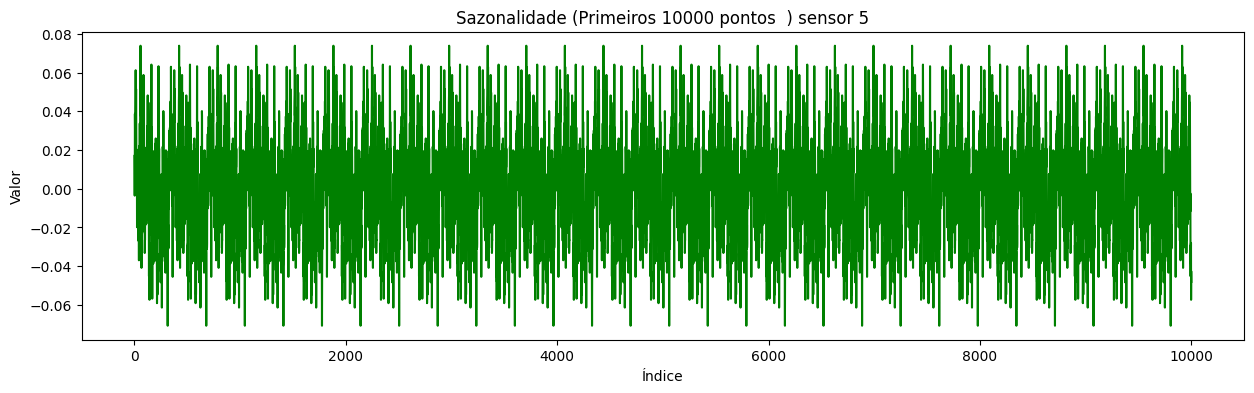

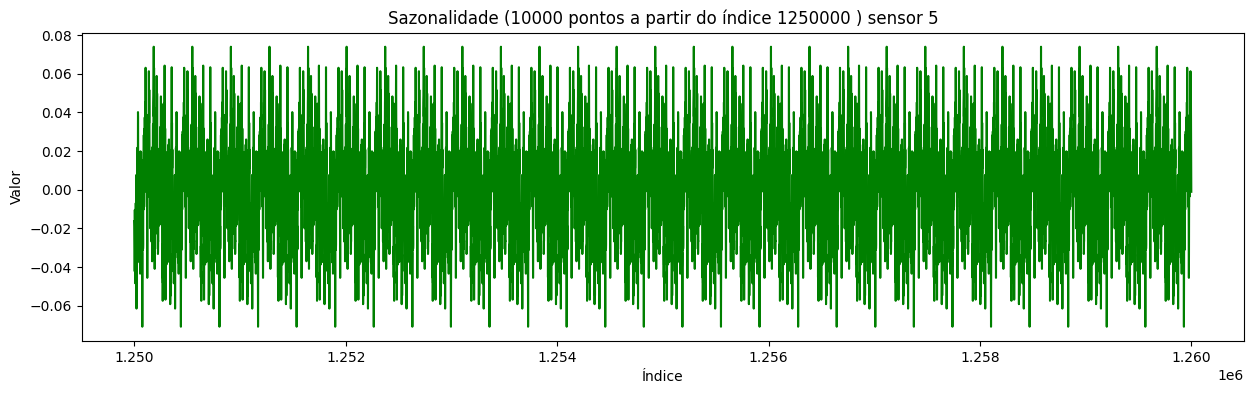

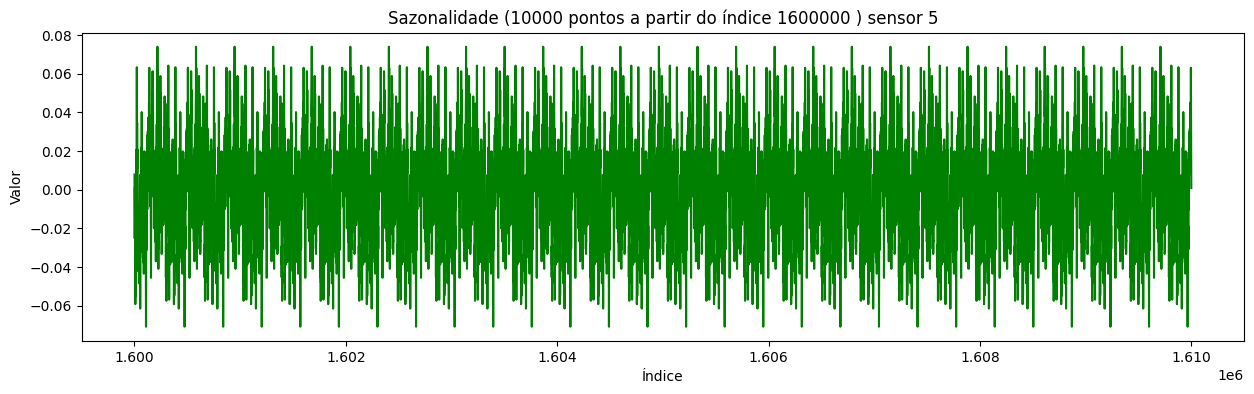

In [35]:
# Plotando a sazonalidade (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a sazonalidade (exibindo a partir do índice 1250000 por 10000 pontos)
index_start_saz = 1250000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1600000 por 10000 pontos)
index_start_saz = 1600000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.seasonal[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Sazonalidade ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

##5.3  Verificação do ruído.

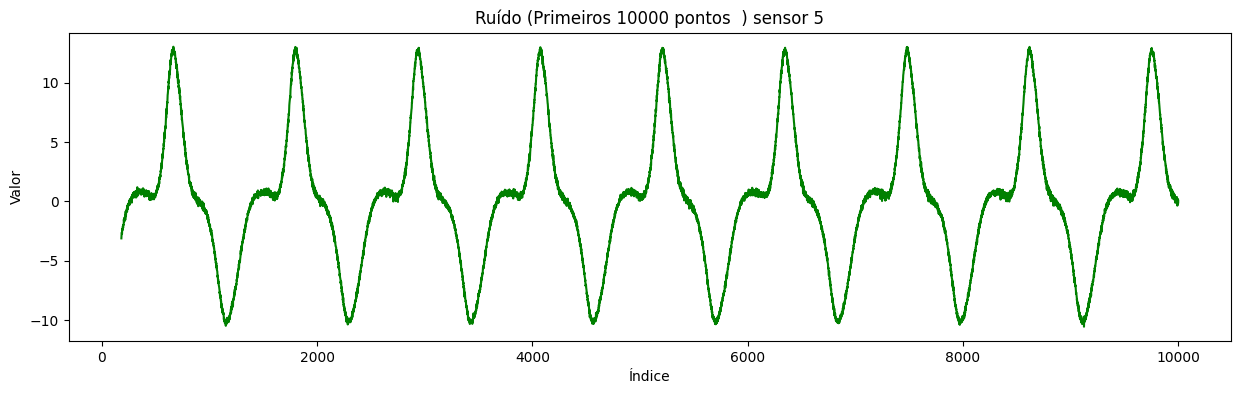

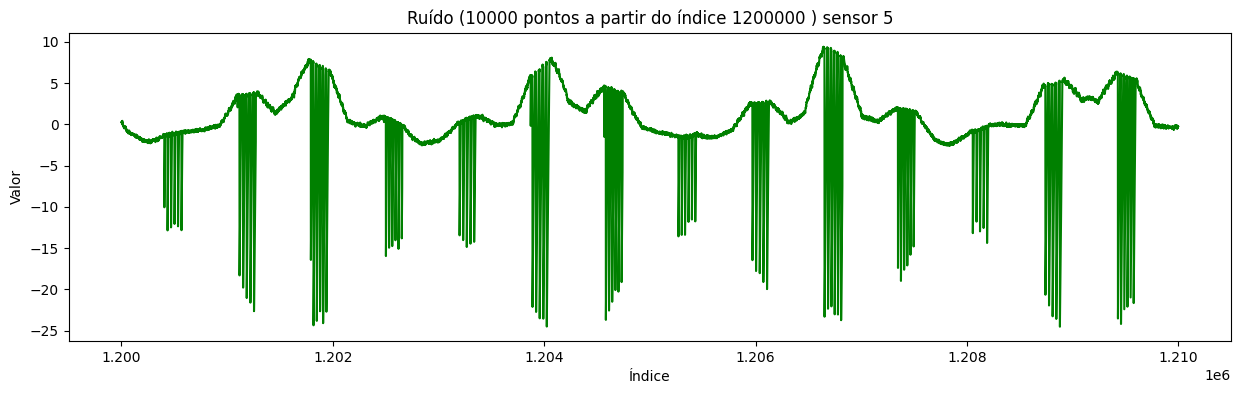

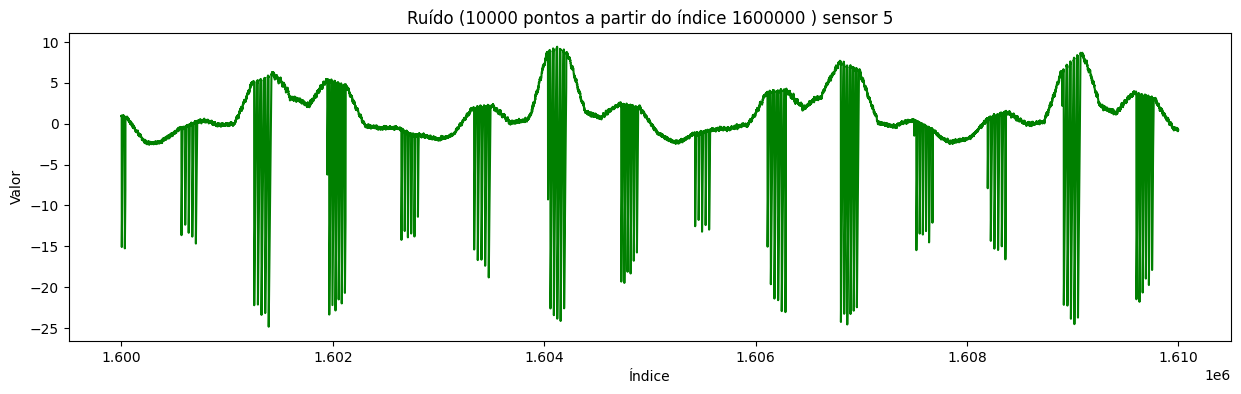

In [36]:
# Plotando a Ruído (exibindo apenas os primeiros 10000 pontos)
index_start_saz = 0
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído (Primeiros {index_end_saz} pontos  ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()

# Plotando a Ruído (exibindo a partir do índice 1200000 por 10000 pontos)
index_start_saz = 1200000
ndex_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


# Plotando a sazonalidade (exibindo a partir do índíce  1600000 por 10000 pontos)
index_start_saz = 1600000
index_end_saz = 10000
plt.figure(figsize=(15, 4))
plt.plot(indices[index_start_saz:index_end_saz + index_start_saz], result.resid[index_start_saz:index_end_saz + index_start_saz], color='green')
plt.title(f'Ruído ({index_end_saz} pontos a partir do índice {index_start_saz} ) sensor {sensor}')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.show()


##5.4 Aplicação do Algoritmo de Detecção de Anomalias

Resíduos: [-3.10876465 -3.10876465 -3.10876465 -3.10876465 -3.10876465 -3.10876465
 -3.10876465 -3.10876465 -3.10876465 -3.10876465]
Anomaly Scores: [1.23249484 1.23249484 1.23249484 1.23249484 1.23249484 1.23249484
 1.23249484 1.23249484 1.23249484 1.23249484]
Anomaly Probabilities: [0.77425493 0.77425493 0.77425493 0.77425493 0.77425493 0.77425493
 0.77425493 0.77425493 0.77425493 0.77425493]
Anomalies Detected: [1139322 1139323 1139324 1139325 1139326 1139327 1139328 1139329 1139330
 1139331]


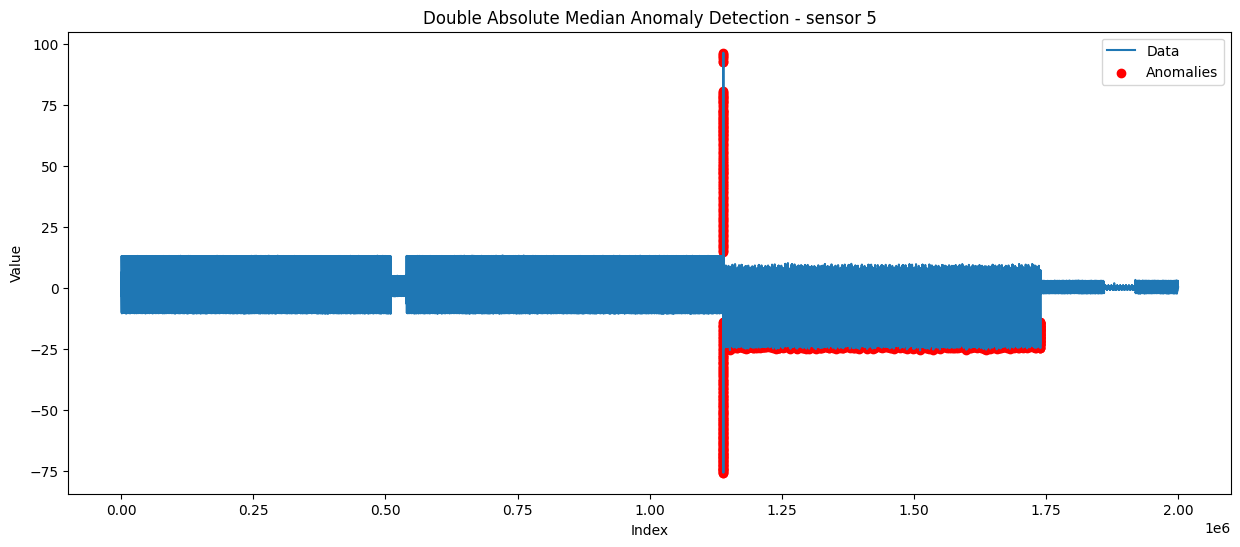

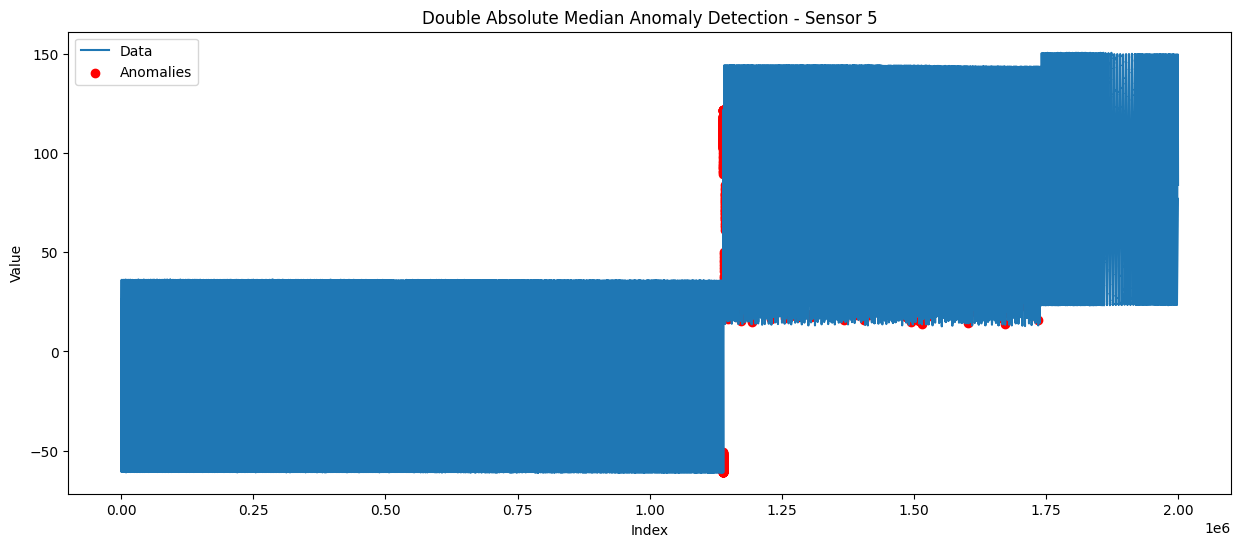

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def double_absolute_median_anomaly_detection(data, threshold=3.5):
    # Calcula a mediana dos dados
    median = np.median(data)

    # Calcula os desvios absolutos da primeira mediana
    first_mad_deviation = np.abs(data - median)

    # Calcula a mediana dos desvios absolutos
    second_median = np.median(first_mad_deviation)

    # Calcula o desvio absoluto da segunda mediana
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Calcula a pontuação de anomalia
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Detecta anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score


# Preenchendo os NaNs em result.resid usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Certifique-se de que todos os NaNs foram preenchidos
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extrair somente os valores, ignorando o índice de datas
resid_values = result_resid_filled.values

# Detectar anomalias
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values)

# Converter anomaly_score para probabilidades usando a função sigmoide
anomaly_probabilities = sigmoid(anomaly_score)

# Aplicar o filtro adicional ao plotar as anomalias
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 0.9999))[0]

# Verificar os resultados intermediários
print("Resíduos:", resid_values[:10])
print("Anomaly Scores:", anomaly_score[:10])
print("Anomaly Probabilities:", anomaly_probabilities[:10])
print("Anomalies Detected:", anomaly_indices[:10])



# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(resid_values, label='Data')
plt.scatter(anomaly_indices, resid_values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotar os resultados com os dados originais
plt.figure(figsize=(15, 6))
plt.plot(sensor_data_sample.values, label='Data')
plt.scatter(anomaly_indices, sensor_data_sample.values[anomaly_indices], color='red', label='Anomalies')
plt.title(f'Double Absolute Median Anomaly Detection - Sensor {sensor}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()